EAE3709 APLICACIONES DE  MACHINE LEARNING EN ECONOMÍA <br>
1ER SEMESTRE 2025 <br>
INSTITUTO DE ECONOMÍA <br>
PONTIFICIA UNIVERSIDAD CATÓLICA DE CHILE


# **TAREA 1**


---


Profesor:
- Joaquín Pérez Lapillo

Ayudantes:

- Luis García B.
- Sebastián Hernández B.
- Oscar Herrera G.


**Complete sus datos:**

- Nombre y apellido:
  - `# Catalina Aránguiz`
  - `# Maykol Medrano`
- Usuario de GitHub (opcional):  `# MaykolMedrano`
`# caranguizc`

**[Repo Github]**: https://github.com/MaykolMedrano/AMLE



## Instrucciones

- Descargue el notebook y cárguelo en su Drive.
- Todas las preguntas deben ser contestadas en su notebook.
- Para que una pregunta esté correcta el código debe correr.
- Si es necesario, realice comentarios breves en su código explicando lo que está realizando o sus resultados.
- Una vez culminada su tarea, suba su notebook al buzón de tareas de Canvas.
- La fecha y hora límite de esta tarea es el _**viernes 4 de abril a las 18:00 hrs**_.



### Distribución de puntaje


| Pregunta                        | Puntaje |
|--------------------------------|---------|
| Pregunta 1.0                   |    1    |
| Pregunta 1.1                   |    3    |
| Pregunta 1.2                   |    3    |
| Pregunta 1.3                   |    2    |
| Pregunta 1.4                   |    2    |
| Pregunta 1.5                   |    5    |
| Pregunta 1.6                   |    2    |
| Pregunta 1.7                   |    5    |
| Pregunta 1.8                   |   7    |
| Pregunta 1.9                   |   5    |
| Pregunta 1.10                  |   5    |
| Pregunta 1.11                  |   6    |
| Pregunta 1.12                  |    2    |
| Pregunta 1.13                  |    5    |
| Pregunta 1.14                  |   10    |
| Pregunta 1.15                  |    5    |
| Pregunta 1.16                  |    5    |
| Pregunta 2.0                   |    2    |
| Pregunta 2.1                   |    5    |
| Pregunta 2.2                   |    5    |
| Pregunta 2.3                   |    5    |
| Pregunta 2.4                   |    3    |
| Pregunta 2.5                   |    3    |
| Pregunta 2.6                   |    2    |
| Pregunta 2.7                   |    2    |

Total: 100 pts.


### Sobre el Bonus

- La entrega, por defecto, es a través de Canvas. Sin embargo, puede escoger voluntariamente entregar la tarea en su GitHub personal.

- Si usted realiza la entrega en GitHub antes de la **fecha y hora indicada**, entonces tendrá una bonificación de 0.3 en su nota final de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub, entonces su calificación en esta tarea será de 6.8.

- Si **además** de realizar la entrega a través de GitHub, usted logra crear `branches` (ramas) y realizar un `merge` entre ramas, entonces se le bonificará con 0.5 en su nota de tarea. Es decir, si usted obtuvo una nota de 6.5, pero entregó en su GitHub e hizo el trabajo de ramas, entonces su calificación en esta tarea será de 7.0.

  - Se valora capacidad autodidacta.
  - Sólo serán considerados los archivos contenidos en su rama principal a la fecha y hora indicada.



## Exploratory data analysis (EDA)

Para esta tarea se utilizará como principal fuente de información un dataset con una serie de características económicas, demográficas y de desarrollo humano de distintos países a la fecha de 2007 (corte transversal). El dataset está disponible en el siguiente [Github](https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv).<br>

Descripción del dataset:

Variables:

*   date: Fecha en la que se actualizó la data.
*   Population, Area (sq. mi.) Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration, Infant mortality (per 1000 births), GDP ($ per capita, Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%), Climate, Birthrate, Deathrate, Agriculture, Industry, Service: Características del país.
*   source: fuente de los datos.
*   Region: Región (grupo de países).
*   Country: País.

### Pregunta 1.0

Importe las librerías que usará en su tarea.

In [88]:
#Cargamos librerias a usar
# Librerias para manipulación de DataFrames
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize

# Librería para gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# Librería que filtra warnings innecesarios
import warnings
warnings.filterwarnings("ignore")

### Pregunta 1.1

Importe el dataset como un DataFrame (df) directamente desde Github (es decir, no descargue el archivo manualmente). A lo largo de la tarea este df se denominará como `df`.


In [89]:
# Cargamos
url = 'https://raw.githubusercontent.com/lfgarcia-1/EAE3709-1-2025/refs/heads/main/economic_dataset.csv'
df  = pd.read_csv(url)
df

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,US Goverment,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,US Goverment,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,US Goverment,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,US Goverment,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,US Goverment,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2007-01-01,US Goverment,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,US Goverment,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,US Goverment,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,US Goverment,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


### Pregunta 1.2

Utilice las funciones de Pandas `head()`, `tail()`, `info()` y la propiedad (o atributo) `.dtypes` para describir el `df`. Explique brevemente para qué sirve cada función.

In [90]:
# Para poder visualizar las cinco (default) primeras observaciones de nuestro DataFrame usamos la función head()
df.head()

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,US Goverment,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,US Goverment,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,US Goverment,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,US Goverment,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,US Goverment,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [91]:
# Para poder visualizar las cinco ultimas (default) observaciones de nuestro DataFrame usamos la función head()
df.tail()

,date,source,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,2007-01-01,US Goverment,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,US Goverment,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,US Goverment,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,US Goverment,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489
226,2007-01-01,US Goverment,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.00,67.69,...,26.8,8.32,0.34,91.34,2.0,28.01,21.84,0.179,0.243,0.579


In [92]:
# Para poder conocer la metadata de nuestro DataFrame usamos la función info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                227 non-null    object 
 1   source                              227 non-null    object 
 2   Country                             227 non-null    object 
 3   Region                              227 non-null    object 
 4   Population                          227 non-null    int64  
 5   Area (sq. mi.)                      227 non-null    int64  
 6   Pop. Density (per sq. mi.)          227 non-null    float64
 7   Coastline (coast/area ratio)        227 non-null    float64
 8   Net migration                       224 non-null    float64
 9   Infant mortality (per 1000 births)  224 non-null    float64
 10  GDP ($ per capita)                  226 non-null    float64
 11  Literacy (%)                        209 non-n

In [93]:
# Si estamos interesado en poder conocer el tipo de objeto de nuetras columnas (tipo de variables) del DataFrame usamos la función .dtypes
df.dtypes

,0
date,object
source,object
Country,object
Region,object
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64


### Pregunta 1.3

La variable `source` es innecesaria debido que contiene el mismo valor para todas las observaciones. Elimine esta variable de su `df`.

In [94]:
 # Usamos la función drop() para eliminar una columna especifica en nuestro df, en este caso "source".
df = df.drop(columns=['source'])
df

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,2007-01-01,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,...,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,2007-01-01,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,...,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,2007-01-01,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,...,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,2007-01-01,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,...,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,2007-01-01,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,...,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2007-01-01,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,...,145.2,16.90,18.97,64.13,3.0,31.67,3.92,0.090,0.280,0.630
223,2007-01-01,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,NaN,NaN,NaN,...,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400
224,2007-01-01,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.00,61.50,800.0,...,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
225,2007-01-01,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.00,88.29,800.0,...,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


### Pregunta 1.4

Transforme el tipo de la variable `date` a `datetime` _datatype_.

In [95]:
# Formateamos la columna "Date"
df['Country'] = df['Country'].str.rstrip()  # Elimanos espacio en blanco al final del string
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d").dt.year
df.dtypes

,0
date,int32
Country,object
Region,object
Population,int64
Area (sq. mi.),int64
Pop. Density (per sq. mi.),float64
Coastline (coast/area ratio),float64
Net migration,float64
Infant mortality (per 1000 births),float64
GDP ($ per capita),float64


### Pregunta 1.5

Para determinar si las variables son "útiles" y sus valores son "correctos" es necesario comprender cada uno de los atributos del dataset.
Investigue y explique brevemente la relación **teórica** entre el `GDP (% per capita)` y cada una de las variables denominadas como "Características del país" en la introducción.

Ejemplo: Existe una variable denominada `Coastline (coast/area ratio)`. Coastline es una medida de la cantidad de costa (acceso a mar) del país normalizada al área total del país para no beneficiar a países más grandes pero con la misma proporción de costa. A mayor "Costline" aumenta la capacidad portuaria per capita del país, más puertos facilita el comercio y podría aumentar el GDP per cápita.




---

*   **Population**: Es el número de personas que habitan un país. La variación del PIB per cápita se calcula como la tasa de crecimiento del PIB dividida entre la tasa de crecimiento de la población. Si la población crece más rápido que el PIB, el PIB per cápita disminuirá.

*  **Area** : Es la extensión territorial de un país, medida en millas cuadradas (sq. mi). La relación con el PIB per cápita no es directa, ya que depende del uso que se le dé a la superficie. Por ejemplo, un país con gran superficie, como Brasil, puede tener zonas inhabitables por razones ecológicas o de conservación (como la Amazonía). El área también se utiliza para calcular la densidad poblacional.

*   **Pop. Density**: Es la cantidad de población por unidad de superficie (personas por milla cuadrada). No explica directamente el PIB per cápita, ya que su impacto depende del contexto. Por ejemplo, Japón tiene alta densidad y alto PIB per cápita, mientras que EE. UU. tiene baja densidad y también alto PIB per cápita.

*   **Net migration:** Es el número de inmigrantes menos el número de emigrantes durante un período (en este caso, 2007). Su relación con el PIB per cápita no es directa. Lo relevante es cómo la migración interactúa con la estructura económica, las instituciones y el contexto del país receptor.

*  **Infant Mortality:** Es el número de muertes de niños menores de un año por cada 1.000 nacidos vivos. Se considera un indicador clave de salud pública y desarrollo socioeconómico. Diversos estudios han demostrado una relación negativa con el PIB per cápita: a mayor ingreso promedio, menor mortalidad infantil.

*  **Literacy:** Mide el porcentaje de personas mayores de cierta edad que pueden leer, escribir y comprender textos simples. Es un indicador del capital humano y del nivel educativo de un país. Existe una relación positiva con el PIB per cápita, aunque la causalidad puede ir en ambas direcciones: un país más rico puede invertir más en educación, y una población más educada puede generar mayor productividad y riqueza.

*   **Phones:** Es una métrica que sirve como proxy de conectividad tecnológica, midiendo cuántos teléfonos hay por cada 1.000 habitantes. Para el año 2007, este indicador refleja bien el nivel de desarrollo tecnológico de un país, por lo que suele estar positivamente correlacionado con el PIB per cápita.

*   **Arables:** Es el porcentaje de tierra apta para el cultivo. La relación con el PIB per cápita depende de la capacidad del país para explotar esa tierra. Si un país no cuenta con los recursos o tecnología para aprovechar esta ventaja, el efecto puede ser limitado. Hay casos donde países con poca tierra cultivable logran altos PIB per cápita gracias a una fuerte inversión en tecnología agrícola.

*   **Crops:** Se refiere a los cultivos agrícolas producidos (como arroz, maíz, frutas, verduras). Su relación con el PIB per cápita no es directa. Lo importante es cómo se inserta esta producción en las cadenas de valor. Por ejemplo, Colombia produce café, pero gran parte del valor se genera en los países que procesan y comercializan el producto.

*   **Climate:** (1.0 = Clima árido o desértico, 2.0 = Clima templado/húmedo, 3.0 = Clima tropical o ecuatorial) Aunque no hay una relación directa con el PIB per cápita, el clima influye en factores como agricultura, desastres naturales, productividad y salud pública, lo que puede afectar el desarrollo económico.

*   **Birthrate:** Es la tasa de natalidad, medida como nacimientos vivos por cada 1.000 habitantes. Está asociada al nivel educativo y al acceso a métodos anticonceptivos. A medida que las mujeres acceden a mayor educación y participan en el mercado laboral, la tasa de natalidad tiende a disminuir. Los países más desarrollados suelen tener tasas de natalidad más bajas.

*   **Deathrate:** Es la tasa de mortalidad general, medida como el número de muertes por cada 1.000 habitantes. Existe una relación negativa con el PIB per cápita, ya que los países con mayores ingresos tienden a tener mejor acceso a servicios de salud, educación y calidad de vida.

Las siguientes variables corresponden a la actividad económica y compone el PIB, es decir la suma de ellos sera el 100% de PIB:

*   **Agriculture:** A mayor participación agrícola, menor suele ser el ingreso promedio por habitante, lo cual refleja estructuras económicas menos diversificadas y de menor productividad. Esta relación no implica que la agricultura sea innecesaria o irrelevante, sino que el desarrollo económico suele venir acompañado de una transformación estructural hacia sectores con mayor valor agregado.

*   **Industry:** Incluye actividades económicas que transforman materias primas en bienes manufacturados (textiles, alimentos, maquinaria, productos químicos, etc.). En general, una mayor participación industrial suele estar positivamente asociada con un mayor PIB per cápita.

*   **Service:** Engloba actividades económicas no relacionadas con bienes tangibles (educación, salud, finanzas, turismo, etc.). Existe una relación positiva entre la participación del sector servicios y el PIB per cápita: a medida que las economías se desarrollan, los servicios tienden a representar una mayor proporción del valor agregado.

---



### Pregunta 1.6

Calcule estadísticas descriptivas para cada variable numérica.

In [96]:
# Para calcular un resumen estaditico de solamente variables númericas delimitamos con .select_dtypes
df = df.drop(columns=['Climate'])
df.select_dtypes(include=np.number).describe()

,date,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
count,227.0,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2007.0,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,22.114732,9.241345,0.150844,0.282711,0.565283
std,0.0,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,11.176716,4.990026,0.146798,0.138272,0.165841
min,2007.0,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,2007.0,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,2007.0,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,2007.0,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,29.820000,10.605000,0.221000,0.341000,0.678500
max,2007.0,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,50.730000,29.740000,0.769000,0.906000,0.954000


**Importante**: Eliminamos la variable "Climate" en vista que su estructura responde a una variable categorica, pero es considerada como númerica en el DataFrame.

### Pregunta 1.7

Según corresponda, realice un gráfico de distribución de densidad o histograma para describir 3 variables del `df` que usted crea más relevantes.

¿Por qué es importante analizar las distribuciones de las variables a utilizar en su modelo? Ejemplifique su respuesta con al menos una de las variables del df`.

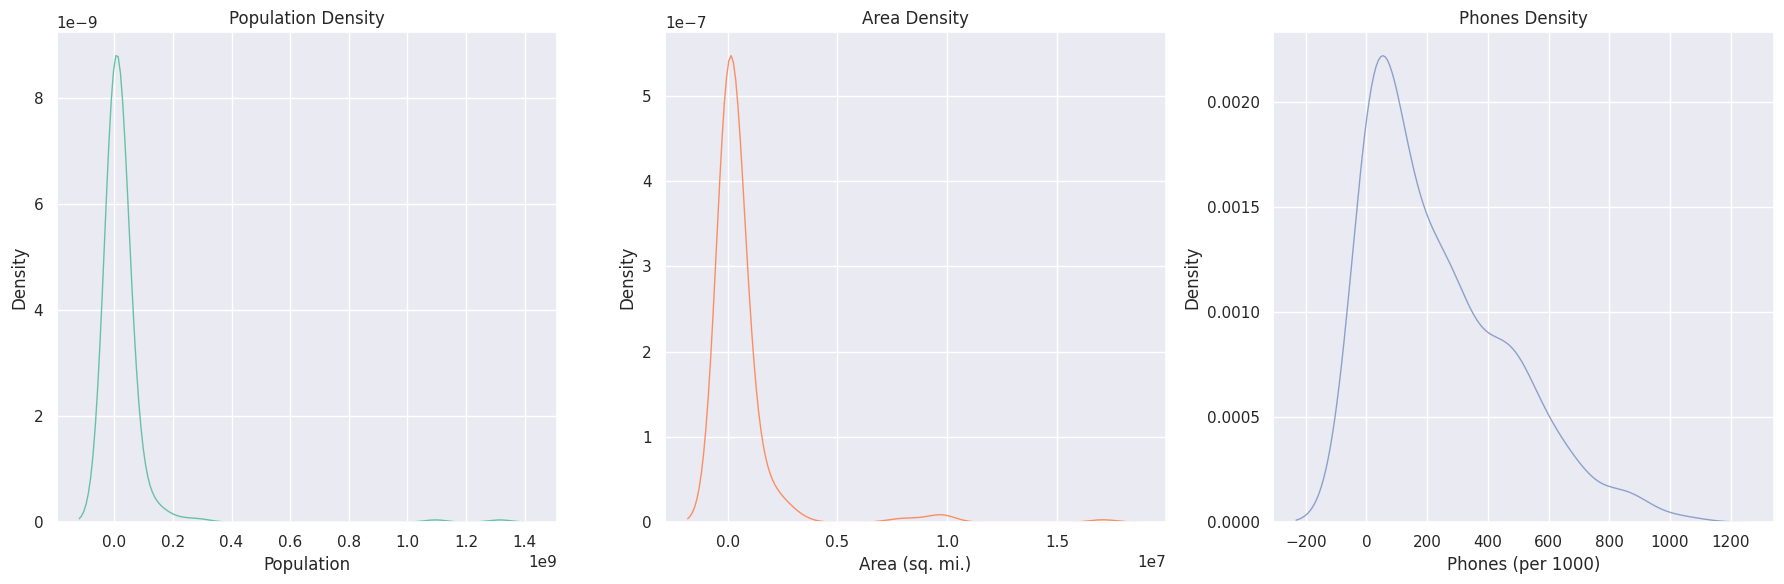

In [97]:
# Seleccionamos tres variables relevantes
pop    = df['Population']
area   = df['Area (sq. mi.)']
phones = df['Phones (per 1000)']

# Definimos tres colores
colors = sns.color_palette("Set2", 3)

# Definimos las dimensiones
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Graficamos 'Population'
sns.kdeplot(pop, fill=False, common_norm=False, color=colors[0], linewidth=1, ax=axes[0])
axes[0].set_title('Population Density')

# Graficamos 'Area'
sns.kdeplot(area, fill=False, common_norm=False, color=colors[1], linewidth=1, ax=axes[1])
axes[1].set_title('Area Density')

# Graficamos 'Phones'
sns.kdeplot(phones, fill=False, common_norm=False, color=colors[2], linewidth=1, ax=axes[2])
axes[2].set_title('Phones Density')

# Ajustamos
plt.tight_layout()
plt.show()




---


El análisis de las distribuciones de las variables nos permite conocer el tipo de distribución de cada variable y detectar la presencia de valores extremos (outliers), los cuales pueden afectar los resultados de nuestro modelo.

El gráfico de densidad de la variable Phones muestra una distribución sesgada a la derecha, con una cola alargada en ese mismo sentido. Esto sugiere la existencia de valores muy altos (outliers), que podrían influir en las estimaciones posteriores, afectando la consistencia y precisión de los resultados obtenidos.

Evaluar la distribución de las variables permite tomar decisiones informadas sobre la preparación de los datos antes del modelado. Esto ayuda a evitar errores de especificación, mejora la precisión de las estimaciones y garantiza la validez de las inferencias realizadas.

---



### Pregunta 1.8

El df contiene variables con missing values (`NaN`). Impute los `NaN` con el método que estime conveniente, justificando su decisión.

¿Es pertinente eliminar alguna de estas variables? Hágalo si es el caso.

In [98]:
#Vericamos que variables tienen missing values (NaN)
miss_value = df.isnull().sum().sort_values(ascending=False)
miss_value

,0
Literacy (%),18
Industry,16
Service,15
Agriculture,15
Deathrate,4
Phones (per 1000),4
Net migration,3
Infant mortality (per 1000 births),3
Birthrate,3
Other (%),2


In [99]:
# Ya que tenemos información sobre la región a la cual pertenece el país podemos tomar un promedio según región e inputar la información faltante.
# Imputar cada variable utilizando el promedio regional:

# Columnas identificadas que presentan missing values
columns_missing = ['Literacy (%)', 'Industry', 'Agriculture', 'Service',
             'Deathrate', 'Phones (per 1000)', 'Net migration',
             'Infant mortality (per 1000 births)', 'Birthrate',
             'Other (%)', 'Crops (%)', 'Arable (%)', 'GDP ($ per capita)']

# Imputamos usando la media de de cada región, en los paises faltante
for var in columns_missing:
    df[var] = df[var].fillna(df.groupby('Region')[var].transform('mean'))
df

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service
0,2007,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.060,163.070,700.0,36.000000,3.2,12.13,0.22,87.65,46.600,20.340,0.380000,0.240000,0.380000
1,2007,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.930,21.520,4500.0,86.500000,71.2,21.09,4.42,74.49,15.110,5.220,0.232000,0.188000,0.579000
2,2007,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.390,31.000,6000.0,70.000000,78.1,3.22,0.25,96.53,17.140,4.610,0.101000,0.600000,0.298000
3,2007,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.710,9.270,8000.0,97.000000,259.5,10.00,15.00,75.00,22.460,3.270,0.175125,0.215250,0.608938
4,2007,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.600,4.050,19000.0,100.000000,497.2,2.22,0.00,97.78,8.710,6.250,0.044480,0.246083,0.714625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2007,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.980,19.620,800.0,79.521429,145.2,16.90,18.97,64.13,31.670,3.920,0.090000,0.280000,0.630000
223,2007,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,-0.432,30.916,5460.0,67.240000,100.2,0.02,0.00,99.98,20.814,4.806,0.135000,0.426200,0.400000
224,2007,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.000,61.500,800.0,50.200000,37.2,2.78,0.24,96.98,42.890,8.300,0.135000,0.472000,0.393000
225,2007,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000,88.290,800.0,80.600000,8.2,7.08,0.03,92.90,41.000,19.930,0.220000,0.290000,0.489000





---


No es necesario eliminar ningun dato de los que presentan missing values, esto es debido que representan un cantidad pequeña con respecto al número total de observaciones, por lo que podemos abordar este problema mediante la imputación de datos.

**La estrategia**: Es posible usar el valor promedio por región e imputar esos valores en los paises donde no se encuentran información, este metodo ayuda a capturar las caracteristicas de los paises pertenecientes a la región.


---


### Pregunta 1.9

¿Cómo distribuye el `GDP ($ per capita)` en diferentes **regiones**? Defina una forma ilustrativa de gráficar el `GDP ($ per capita)` para todas las regiones en un mismo gráfico. Interprételo.

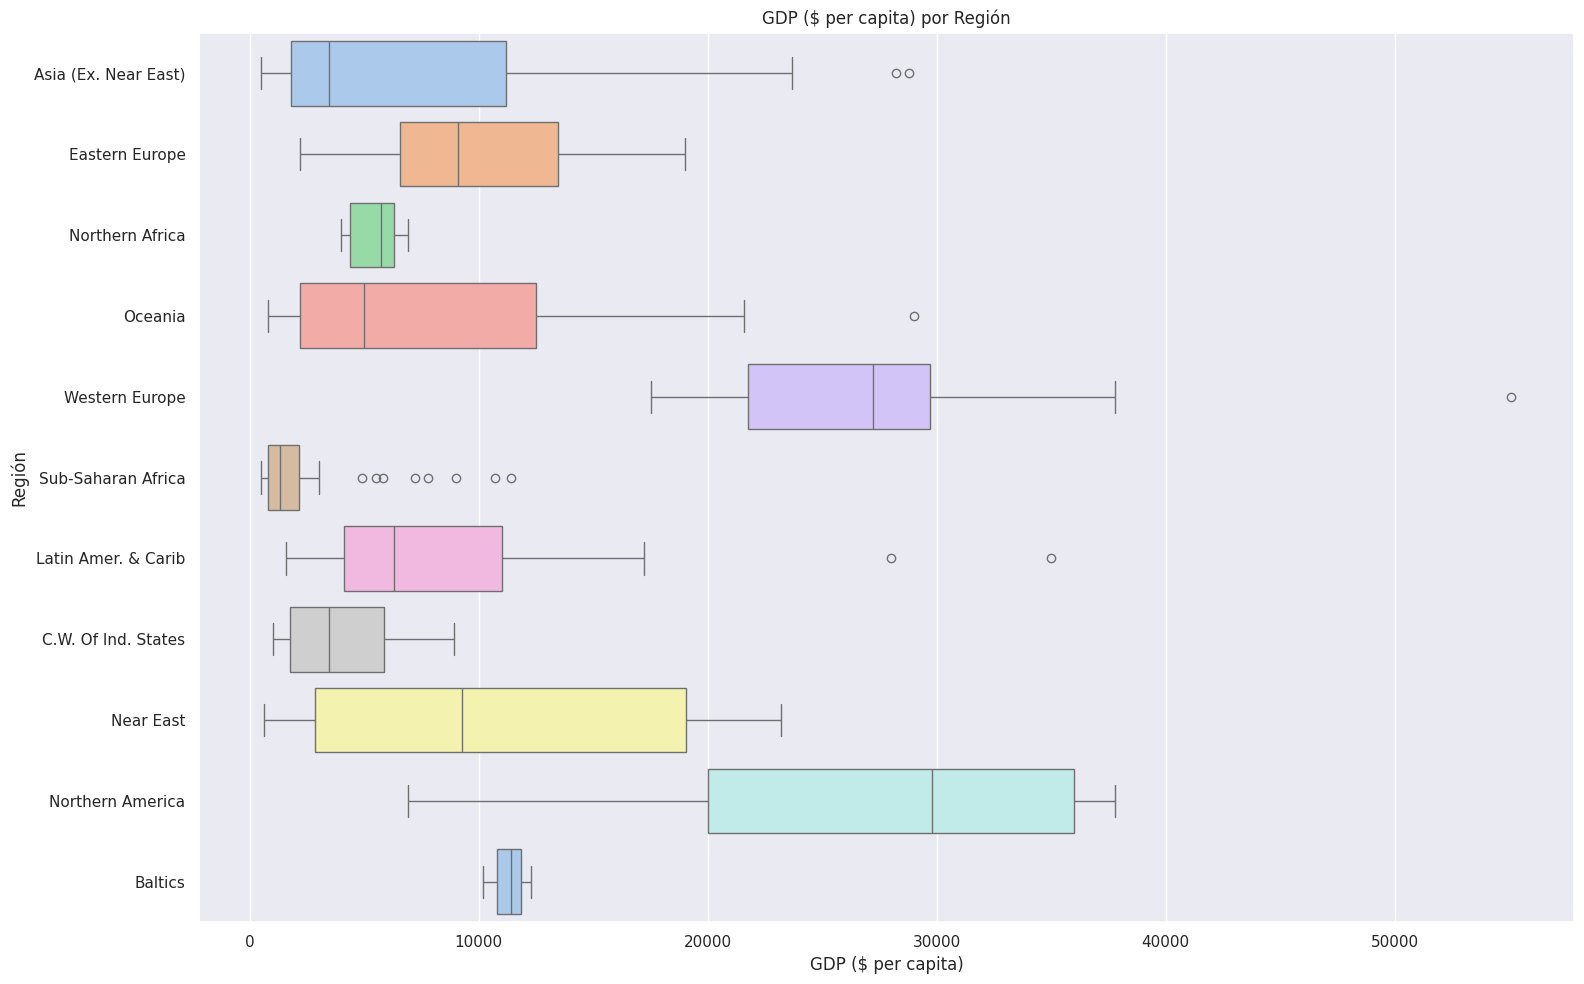

In [100]:
# Modificamos la variables Region para gráficar
df['Region'] = df['Region'].str.casefold()  # Convertimos los string de la columna en tipo lower
df['Region'] = df['Region'].str.title()     # Transformamos la primera letra de cada palabra en tipo upper
df['Region'] = df['Region'].str.rstrip()    # Eliminamos espacios redundantes en el string

# Configuramos el estilo y el tamaño de la figura
sns.set(style="darkgrid")
plt.figure(figsize=(16, 10))

# Creamos el boxplot horizontal
ax = sns.boxplot(data=df, x='GDP ($ per capita)', y='Region', hue='Region', orient='h', palette="pastel")
ax.set_title('GDP ($ per capita) por Región')
ax.set_xlabel('GDP ($ per capita)')
ax.set_ylabel('Región')

# Ajustamos
plt.tight_layout()
plt.show()




---
El gráfico boxplot presenta la distribución del "GDP ($ per capita)" por región a nivel global. A grandes rasgos, se observan claras diferencias entre regiones, destacándose regiones como **Northern America** y **Western Europe**, que presentan los valores más elevados, superando en algunos casos los 40,000 y hasta 50,000 dólares per cápita. Esto refleja un alto nivel económico y mayor bienestar promedio en estas áreas.

En contraste, regiones como **Sub-Saharan Africa** muestran niveles notablemente más bajos de ingreso per cápita, con la mayor parte de sus datos concentrados por debajo de los 10,000 dólares. Esta región, además, presenta numerosos valores atípicos que evidencian cierta heterogeneidad interna, con algunos países superando ligeramente ese rango típico.

Las regiones intermedias, como **Eastern Europe**, **Latin Amer. & Carib**, **Asia (Ex. Near East)** y **C.W. of Ind. States**, muestran niveles moderados de PIB per cápita, fluctuando generalmente entre 5,000 y 20,000 dólares. Estas áreas evidencian cierto grado de dispersión, sugiriendo que, aunque existe una economía relativamente más homogénea en comparación con las regiones más ricas, aún persisten diferencias significativas entre países.

En tanto, regiones como los **Baltics** y **Northern Africa** presentan distribuciones compactas con PIB per cápita relativamente bajo, ubicándose mayormente entre 5,000 y 10,000 dólares, reflejando economías menos prósperas, aunque con menor variabilidad interna.

---


### Pregunta 1.10

Supongamos que `GDP ($ per capita)` es su variable objetivo. Estudie la correlación de esta variable con el resto de las variables del `df`. ¿Por qué es importante analizar la correlación entre las variables?



In [101]:
# Selecionamos solo variables númericas para correlacionar
df_corr1 = df.select_dtypes(include=np.number).corr()["GDP ($ per capita)"]

#df_corr1 = df_corr1.sort_values(ascending=False).abs()
# Correlacionamos las variables de interes, luego convertimos a valor absoluto para identificar las variables con mayor correlación.
df_corr1 = df_corr1.abs()
df_corr1 = df_corr1.sort_values(ascending=False)
df_corr1[df_corr1.values < 1].head(3)

,GDP ($ per capita)
Phones (per 1000),0.830684
Birthrate,0.643247
Infant mortality (per 1000 births),0.596963




---

Las correlaciones nos permiten observar las **asociaciones** que existen entre variables cuantitativas. En este caso que variables tiene asociación con el GDP per capita, es decir que variables relevantes de nuestro modelo podrian llegar a explicar la variabilidad del crecimiento de un pais, y ademas podemos observar como estas interactuan es decir de forma negativa o positiva. Se obtuvo que las variables con mayor correlacion fueron:


*   **Phones:** Presenta una fuerte correlacion positiva, es decir paises con mayor acceso telefonicos (proxy de tecnologia) suelen tener mayor PIB per capita.

*   **Birthrate:** La natalidad esta correlacionada negativamente con el GDP per capita, es decir mientras el pais tiene mayor gdp per capita la natalidad es menor. (discutido anteriormente).

*   **Infant Mortality:** La mortalidad infantil esta correlacionada negativamente con  el GDP per capita, es decir que mientras mas alto es el GDP per capita menor es la natalidad infantil. (relacion discutida anteriormente).





Estas variables solo indican correlacion y no tienen nada que ver con la existencia o no de causalidad en el modelo.


---


### Pregunta 1.11

Realice tres _scatterplots_ (uno por variable) de las tres variables con la mayor correlación con la variable objetivo.

Utilizando los parámetros de la función con la que hizo los _scatterplots_, coloque un título a cada gráfico y agregue colores a los _data points_ del _scatterplot_- Use colores diferentes por cada gráfico.

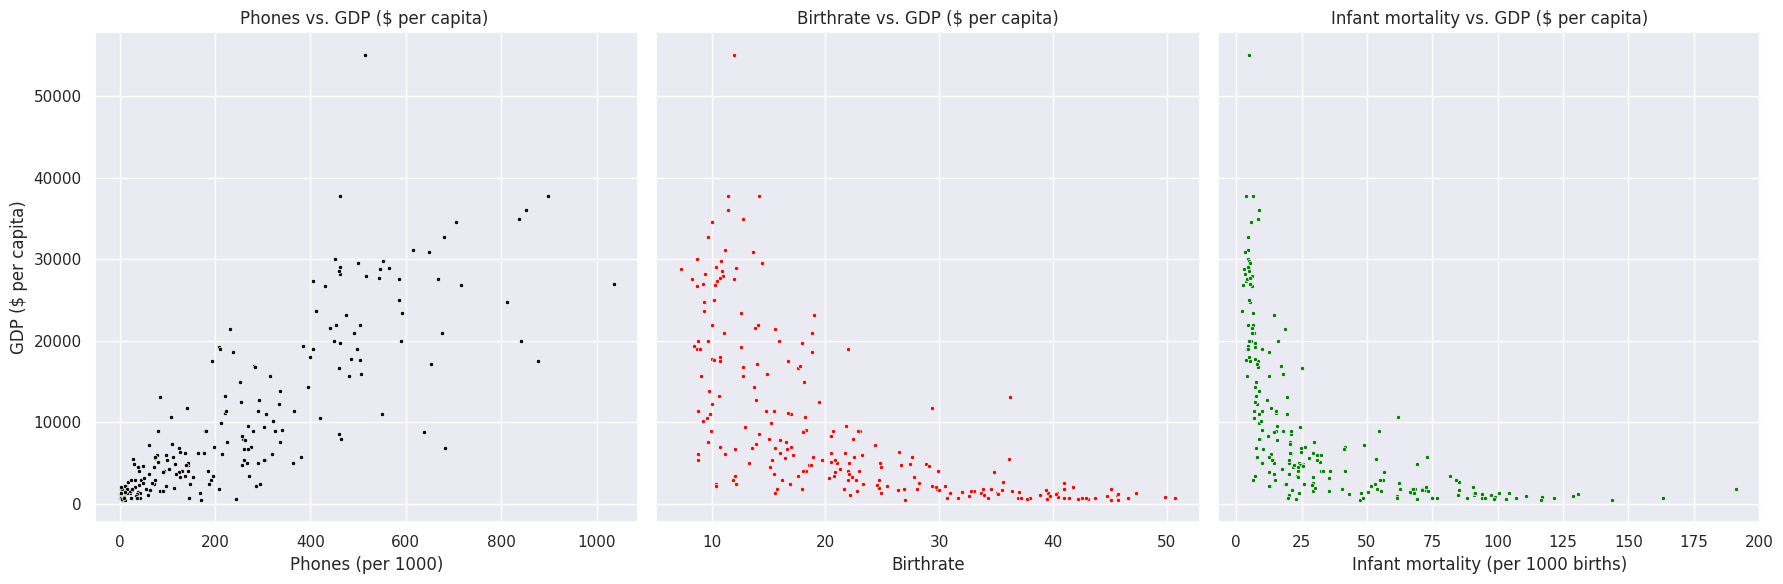

In [102]:
# Seleccionamos tres variables relevantes
phones           = df['Phones (per 1000)']
birthrate        = df['Birthrate']
infant_mortality = df['Infant mortality (per 1000 births)']
gdp              = df['GDP ($ per capita)']

sns.set(style="darkgrid")
# Definimos las dimensiones de la figura
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

## Usamos regplot para realizar un scatter con su linea de ajuste

# Graficamos 'phones'
sns.scatterplot(x=phones, y=gdp, color="black", marker='.', ax=axes[0])
axes[0].set_title('Phones vs. GDP ($ per capita) ')

# Gráficamos 'birthrate'
sns.scatterplot(x=birthrate, y=gdp, color="red", marker='.', ax=axes[1])
axes[1].set_title('Birthrate vs. GDP ($ per capita)')

# Gráficamos 'infant_mortality'
sns.scatterplot(x=infant_mortality, y=gdp, color="green", marker='.', ax=axes[2])
axes[2].set_title('Infant mortality vs. GDP ($ per capita)')

# Ajustamos la figura
plt.tight_layout()
plt.show()

### Pregunta 1.12

Cree una nueva columna `GDP (%)` que represente el GDP total de cada pais (no per capita) y agreguela al dataframe.

In [103]:
# Calcular el GDP % de cada pais
df['GDP ($)']   = df['GDP ($ per capita)'] * df['Population']
df

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($)
0,2007,Afghanistan,Asia (Ex. Near East),31056997,647500,48.0,0.00,23.060,163.070,700.0,...,3.2,12.13,0.22,87.65,46.600,20.340,0.380000,0.240000,0.380000,2.173990e+10
1,2007,Albania,Eastern Europe,3581655,28748,124.6,1.26,-4.930,21.520,4500.0,...,71.2,21.09,4.42,74.49,15.110,5.220,0.232000,0.188000,0.579000,1.611745e+10
2,2007,Algeria,Northern Africa,32930091,2381740,13.8,0.04,-0.390,31.000,6000.0,...,78.1,3.22,0.25,96.53,17.140,4.610,0.101000,0.600000,0.298000,1.975805e+11
3,2007,American Samoa,Oceania,57794,199,290.4,58.29,-20.710,9.270,8000.0,...,259.5,10.00,15.00,75.00,22.460,3.270,0.175125,0.215250,0.608938,4.623520e+08
4,2007,Andorra,Western Europe,71201,468,152.1,0.00,6.600,4.050,19000.0,...,497.2,2.22,0.00,97.78,8.710,6.250,0.044480,0.246083,0.714625,1.352819e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2007,West Bank,Near East,2460492,5860,419.9,0.00,2.980,19.620,800.0,...,145.2,16.90,18.97,64.13,31.670,3.920,0.090000,0.280000,0.630000,1.968394e+09
223,2007,Western Sahara,Northern Africa,273008,266000,1.0,0.42,-0.432,30.916,5460.0,...,100.2,0.02,0.00,99.98,20.814,4.806,0.135000,0.426200,0.400000,1.490624e+09
224,2007,Yemen,Near East,21456188,527970,40.6,0.36,0.000,61.500,800.0,...,37.2,2.78,0.24,96.98,42.890,8.300,0.135000,0.472000,0.393000,1.716495e+10
225,2007,Zambia,Sub-Saharan Africa,11502010,752614,15.3,0.00,0.000,88.290,800.0,...,8.2,7.08,0.03,92.90,41.000,19.930,0.220000,0.290000,0.489000,9.201608e+09


### Pregunta 1.13

Repita el análisis de correlaciones para `GDP ($)` excluyendo `GDP ($ per capita)` del análisis. ¿Cambian las variables que más correlacionan? Justifique.

In [104]:
# Selecionamos solo variables númericas para correlacionar y correlacionamos
df_corr2 = df.drop(columns=['GDP ($ per capita)'])
df_corr2 = df_corr2.select_dtypes(include=np.number).corr()["GDP ($)"]

# Ordenamos y luego convertimos a valor absoluto para identificar las variables con mayor correlación.
df_corr2 = df_corr2.abs()
df_corr2 = df_corr2.sort_values(ascending=False)
df_corr2[df_corr2.values < 1].head(3)

,GDP ($)
Population,0.639528
Area (sq. mi.),0.556396
Phones (per 1000),0.233041





---

**Si, cambian**. Ahora las variables que más correlacionan son Population, Área y Phones. Las correlaciones cambian porque el PIB ($) mide el tamaño de la economía, mientras que el PIB per cápita mide el nivel de vida promedio. Por eso, variables como población y área están fuertemente correlacionadas con el PIB total, mientras que variables como birthrate o infant mortality están más asociadas al PIB per cápita y al desarrollo humano.

---


### Pregunta 1.14

Detecte las observaciones outliers de las tres variables seleccionadas en la pregunta anterior. Además, impute estas observaciones si usted lo considera necesario. Justifique su decisión.

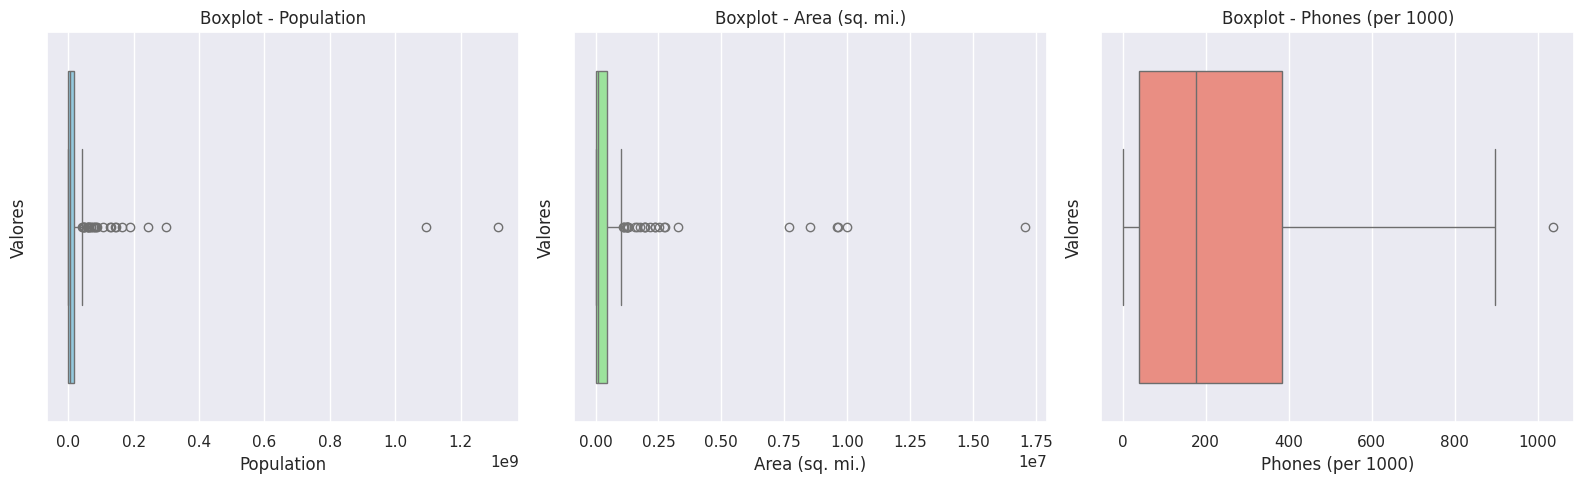

In [105]:
# Supongamos que ya tienes tu DataFrame llamado df
Population = df['Population']
Area       = df['Area (sq. mi.)']
Phones     = df['Phones (per 1000)']

# Definimos las dimensiones de la figura
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Graficamos 'Population'
sns.boxplot(x=Population, ax=axes[0], color="skyblue")
axes[0].set_title('Boxplot - Population')
axes[0].set_xlabel('Population')
axes[0].set_ylabel('Valores')

# Graficamos 'Area (sq. mi.)'
sns.boxplot(x=Area, ax=axes[1], color="lightgreen")
axes[1].set_title('Boxplot - Area (sq. mi.)')
axes[1].set_xlabel('Area (sq. mi.)')
axes[1].set_ylabel('Valores')

# Graficamos 'Phones (per 1000)'
sns.boxplot(x=Phones, ax=axes[2], color="salmon")
axes[2].set_title('Boxplot - Phones (per 1000)')
axes[2].set_xlabel('Phones (per 1000)')
axes[2].set_ylabel('Valores')

# Ajustamos la figura para evitar solapamientos
plt.tight_layout()
plt.show()


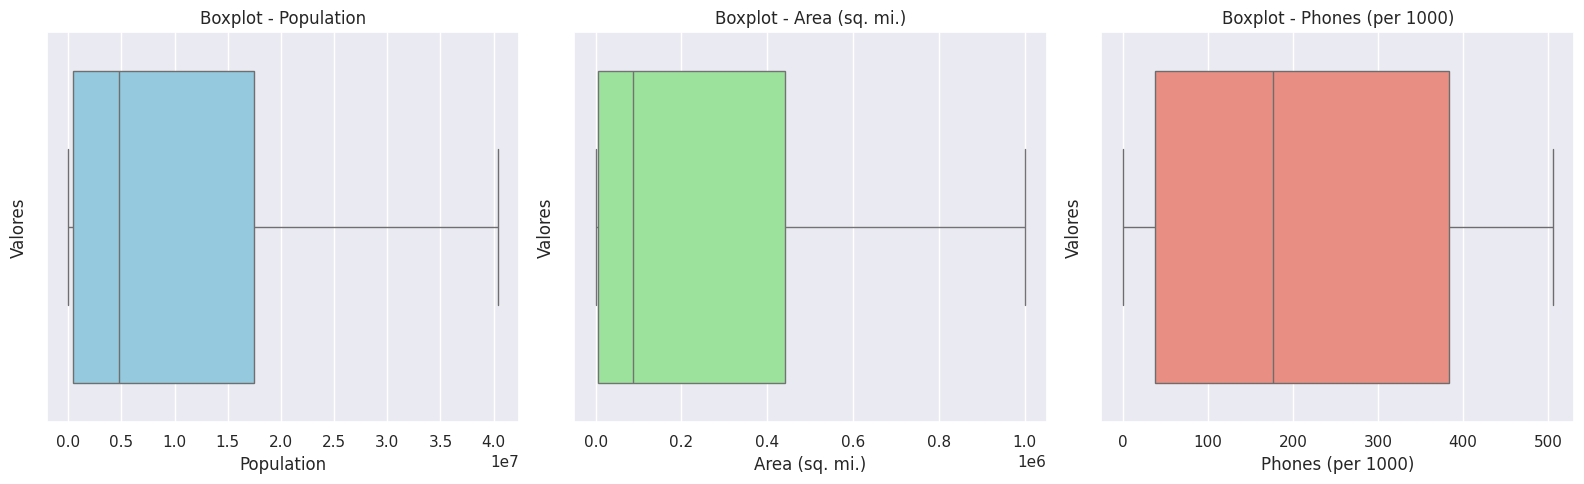

,date,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($)
count,227.0,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,2.270000e+02
mean,2007.0,1.146923e+07,2.705696e+05,379.047137,21.165330,0.017564,35.351909,9671.189427,83.387497,213.904995,13.802067,4.548122,81.649461,22.057237,9.196174,0.149340,0.280103,0.570564,2.322092e+11
std,0.0,1.419539e+07,3.545109e+05,1660.185825,72.286863,4.860778,35.184672,10030.810760,19.251553,182.474895,12.984937,8.326737,16.070331,11.129923,4.965241,0.143648,0.134329,0.163415,9.545988e+11
min,2007.0,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.290000,0.000000,0.020000,0.062000,1.299100e+07
25%,2007.0,4.376240e+05,4.647500e+03,29.150000,0.100000,-1.015000,8.215000,1900.000000,75.300000,38.500000,3.380000,0.190000,71.985000,12.635000,5.810526,0.038000,0.199333,0.443500,2.559705e+09
50%,2007.0,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,20.970000,5500.000000,92.500000,176.200000,10.530000,1.080000,85.380000,18.790000,7.840000,0.099000,0.261000,0.580000,1.628930e+10
75%,2007.0,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,98.000000,382.900000,20.000000,4.435000,95.230000,29.770000,10.580000,0.216500,0.338000,0.682000,8.666668e+10
max,2007.0,4.039784e+07,1.001450e+06,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,505.000000,62.110000,50.680000,100.000000,50.730000,29.740000,0.769000,0.906000,0.954000,1.128119e+13


In [106]:
# Winsorización de 'Population' al 95%
df['Population']        = winsorize(df['Population'], limits=[0, 0.13])
df['Area (sq. mi.)']    = winsorize(df['Area (sq. mi.)'], limits=[0, 0.13])
df['Phones (per 1000)'] = winsorize(df['Phones (per 1000)'], limits=[0, 0.13])

# Supongamos que ya tienes tu DataFrame llamado df
Population = df['Population']
Area       = df['Area (sq. mi.)']
Phones     = df['Phones (per 1000)']

# Definimos las dimensiones de la figura
sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Graficamos 'Population'
sns.boxplot(x=Population, ax=axes[0], color="skyblue")
axes[0].set_title('Boxplot - Population')
axes[0].set_xlabel('Population')
axes[0].set_ylabel('Valores')

# Graficamos 'Area (sq. mi.)'
sns.boxplot(x=Area, ax=axes[1], color="lightgreen")
axes[1].set_title('Boxplot - Area (sq. mi.)')
axes[1].set_xlabel('Area (sq. mi.)')
axes[1].set_ylabel('Valores')

# Graficamos 'Phones (per 1000)'
sns.boxplot(x=Phones, ax=axes[2], color="salmon")
axes[2].set_title('Boxplot - Phones (per 1000)')
axes[2].set_xlabel('Phones (per 1000)')
axes[2].set_ylabel('Valores')

# Ajustamos la figura para evitar solapamientos
plt.tight_layout()
plt.show()

df.select_dtypes(include=np.number).describe()




---


La técnica utilizada para tratar los valores atípicos fue la **winsorización**. Esta es una técnica estadística que reemplaza los valores extremos con los valores más cercanos dentro de un rango definido. Como no había problema en el mínimo y sí en el máximo, definimos el rango en [0, 0.13]. La decisión de este umbral se basa en que logra estabilizar la mayoría de los datos atípicos, además, este valor permite conservar la mayor cantidad de datos originales posibles, mientras se reducen los valores atípicos.

En el extremo inferior de la distribución, no se reemplazó ningún valor (percentil 0). En cambio, en el percentil superior, el 13% de los valores más altos en el conjunto de datos fueron reemplazados por el valor del percentil 87.

Gracias a esta técnica, redujimos el impacto de los valores atípicos. De hecho, comparamos la media de antes y después de estas variables, y la variación fue muy pequeña. Debido a esto, el análisis será más robusto y menos sensible a las fluctuaciones de datos.


---



### Pregunta 1.15

En los ejemplos anteriores calculamos correlaciones para `GDP ($ per capita)` y `GDP ($)`. Genere un nuevo dataframe que tenga le variación porcentual de la correlación absoluta para cada una de las columnas de características, e.g., si la correlación en valor absoluto de `GDP ($ per capita)` vs `Industry` es 0.1 y la correlación `GDP ($)` vs `Industry` es 0.5, la variación deberá ser +500%. Dicha variación porcentual puede ser positiva o negativa, pero ordene los el dataframe de tal manera que la variación de correlación absoluta sea desendiente.

In [107]:
# Fusionamos nuestros resultados de correlaciones
df2 = pd.merge(df_corr1, df_corr2, left_index=True, right_index=True)

# Calculamos la variación % de la correlación y lo ordenamos de forma descedente
df2['Dif. Corr (%)'] = (df2['GDP ($ per capita)'] - df2['GDP ($)'])/ df2['GDP ($)']*100
df2 = df2.sort_values(by='Dif. Corr (%)', ascending=False)
df2

,GDP ($ per capita),GDP ($),Dif. Corr (%)
Net migration,0.383707,0.055508,591.259067
Pop. Density (per sq. mi.),0.196099,0.028487,588.387865
Service,0.553063,0.085856,544.176192
Deathrate,0.196066,0.035793,447.776480
Literacy (%),0.515455,0.102247,404.127262
Infant mortality (per 1000 births),0.596963,0.122662,386.672004
Agriculture,0.584562,0.141690,312.563906
Birthrate,0.643247,0.166856,285.510439
Phones (per 1000),0.830684,0.233041,256.453380
Crops (%),0.218445,0.077726,181.045357


### Pregunta 1.16

Del resultado anterior, ¿qué caracerística del país tuvo una mayor diferencia absoluta el medir su correlación versus `GDP ($)` en vez de `GDP ($ per capita)`'. Interprete.




---

De acuerdo con los resultados que muestran en la tabla la variable con mayor diferencia absoluta es 'Net migration' con un variación positva de 591,25%, seguida de Pop. Density (per sq. mi.) con una varación de 588,38%.

Por el contrario, el indicador que muestra una variación negativa es Population con un redución de 93,92%.

---





## EDA con diferentes fuentes de **información**


Una situación habitual en _Data Science: es el manejo de información de múltiples fuentes para un mismo propósito. En este sentido, de ahora en adelante agregaremos un dataframe adicional a nuestro set de información, disponible en [Github](https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv). Lo llamaremos `df_gini`.

Este dataset contiene información histórica del Índice de Gini (economía), el cual captura la desigualdad económica entre los quintiles de cada país. A mayor índice Gini, más desigual es un país en términos de ingresos. Para mayor información sobre los datos, puede dirigirse al [Repositorio](https://github.com/datasets/gini-index) completo. Para conocer más sobre el índice, una navegación por [Wikipedia](https://en.wikipedia.org/wiki/Gini_coefficient) debería ser suficiente.

### Pregunta 2.0

Cargue la base datos, asegúrese de que la variable de año esté en un formato de "fecha", y usando el diccionario de mapeo por inconsistencias de nombres, `country_name_mapping`, encuentre la forma de realizar un INNER JOIN entre ambas tablas, usando el nombre del país y el año de la observación como variables por las cuales hacer el JOIN. En el diccionario `country_name_mapping`, _keys_ corresponden a los valores de la tabla `df_gini` y _values_ a los de `df`.

Llame al dataframe resultante `df_merged`.

Si usted no se ha percatado, los nombres en la columna `Country` de `df` poseen espacios al final de estos. Elimine los espacios antes de realizar el INNER JOIN de interés (Hint: existe una función propia de las variables tipo `string` que realiza la labor de eliminar espacios al final de la palabra).



In [108]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping = {
    "Bahamas": "Bahamas, The",
    "Bosnia and Herzegovina": "Bosnia & Herzegovina",
    "Myanmar": "Burma",
    "Cabo Verde": "Cape Verde",
    "Central African Republic": "Central African Rep.",
    "Congo, Rep.": "Congo, Repub. of the",
    "Czechia": "Czech Republic",
    "Timor-Leste": "East Timor",
    "Egypt, Arab Rep.": "Egypt",
    "West Bank and Gaza": "Gaza Strip",
    "Iran, Islamic Rep.": "Iran",
    "Korea, Dem. People's Rep.": "Korea, North",
    "Korea, Rep.": "Korea, South",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Laos",
    "North Macedonia": "Macedonia",
    "Micronesia, Fed. Sts.": "Micronesia, Fed. St.",
    "Russian Federation": "Russia",
    "St. Kitts and Nevis": "Saint Kitts & Nevis",
    "St. Lucia": "Saint Lucia",
    "St. Vincent and the Grenadines": "Saint Vincent and the Grenadines",
    "Slovak Republic": "Slovakia",
    "Eswatini": "Swaziland",
    "Syrian Arab Republic": "Syria",
    "Trinidad and Tobago": "Trinidad & Tobago",
    "Turkiye": "Turkey",
    "Venezuela, RB": "Venezuela",
    "Viet Nam": "Vietnam",
    "Yemen, Rep.": "Yemen"
}

In [109]:
# Cargamos la información correspondiente
url = 'https://raw.githubusercontent.com/datasets/gini-index/refs/heads/main/data/gini-index.csv'
df_gini = pd.read_csv(url)
df_gini

,Country Name,Country Code,Year,Value
0,Albania,ALB,1996,27.0
1,Albania,ALB,2002,31.7
2,Albania,ALB,2005,30.6
3,Albania,ALB,2008,30.0
4,Albania,ALB,2012,29.0
...,...,...,...,...
2106,Zambia,ZMB,2015,55.8
2107,Zambia,ZMB,2022,51.5
2108,Zimbabwe,ZWE,2011,43.2
2109,Zimbabwe,ZWE,2017,44.3


In [110]:
# Formateamos la columna "Date"
df_gini["Year"] = pd.to_datetime(df_gini["Year"].astype(str), format="%Y").dt.year

# Remplazamos los nuevos nombres de paises
df_gini['Country'] = df_gini['Country Name'].replace(country_name_mapping)
df_gini['Country'] = df_gini['Country'].str.rstrip() # Eliminamos espacios en blanco redundantes
df_gini

,Country Name,Country Code,Year,Value,Country
0,Albania,ALB,1996,27.0,Albania
1,Albania,ALB,2002,31.7,Albania
2,Albania,ALB,2005,30.6,Albania
3,Albania,ALB,2008,30.0,Albania
4,Albania,ALB,2012,29.0,Albania
...,...,...,...,...,...
2106,Zambia,ZMB,2015,55.8,Zambia
2107,Zambia,ZMB,2022,51.5,Zambia
2108,Zimbabwe,ZWE,2011,43.2,Zimbabwe
2109,Zimbabwe,ZWE,2017,44.3,Zimbabwe


In [111]:
# Fusionamos los DataFrames "df" y "df_gini" mediante un inner join
df_merged = pd.merge(df, df_gini, left_on=['Country', 'date'], right_on=['Country', 'Year'], how='inner')
df_merged

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($),Country Name,Country Code,Year,Value
0,2007,Argentina,Latin Amer. & Carib,39921833,1001450,14.4,0.18,0.61,15.18,11200.0,...,16.73,7.55,0.095,0.358,0.547,4.471245e+11,Argentina,ARG,2007,46.3
1,2007,Armenia,C.W. Of Ind. States,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,...,12.07,8.23,0.239,0.343,0.418,1.041730e+10,Armenia,ARM,2007,31.2
2,2007,Austria,Western Europe,8192880,83870,97.7,0.00,2.00,4.66,30000.0,...,8.74,9.76,0.018,0.304,0.678,2.457864e+11,Austria,AUT,2007,30.6
3,2007,Belarus,C.W. Of Ind. States,10293011,207600,49.6,0.00,2.54,13.37,6100.0,...,11.16,14.02,0.093,0.316,0.591,6.278737e+10,Belarus,BLR,2007,29.6
4,2007,Belgium,Western Europe,10379067,30528,340.0,0.22,1.23,4.68,29100.0,...,10.38,10.27,0.010,0.240,0.749,3.020308e+11,Belgium,BEL,2007,29.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,2007,Thailand,Asia (Ex. Near East),40397842,514000,125.7,0.63,0.00,20.48,7400.0,...,13.87,7.04,0.099,0.441,0.460,4.782738e+11,Thailand,THA,2007,39.8
64,2007,Ukraine,C.W. Of Ind. States,40397842,603700,77.4,0.46,-0.39,20.34,5400.0,...,8.82,14.39,0.187,0.452,0.361,2.522384e+11,Ukraine,UKR,2007,27.0
65,2007,United Kingdom,Western Europe,40397842,244820,247.6,5.08,2.19,5.16,27700.0,...,10.71,10.13,0.005,0.237,0.758,1.678874e+12,United Kingdom,GBR,2007,34.4
66,2007,United States,Northern America,40397842,1001450,31.0,0.21,3.41,6.50,37800.0,...,14.14,8.26,0.010,0.204,0.787,1.128119e+13,United States,USA,2007,40.8


### Pregunta 2.1

Repita el ejercicio de la obtención de un ranking para las correlaciones absolutas, tal como lo hizo para el GDP per cápita. ¿Cuáles son las relaciones que más le sorprenden? ¿Cuáles son las que están en línea con lo que esperaba? Justifique para ambos casos.





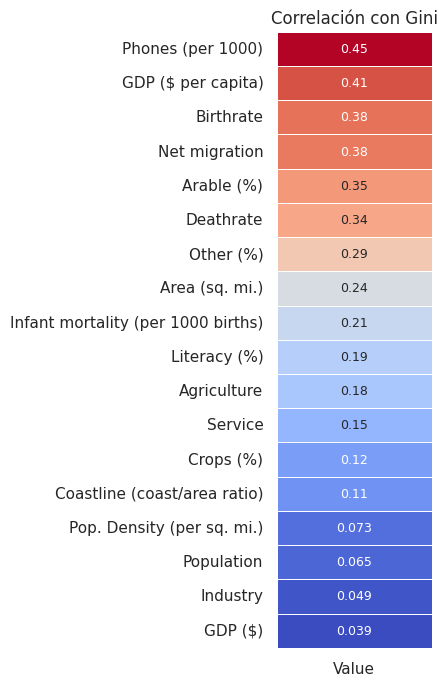

In [112]:
# Seleccion de variables numericas
numeric_df = df_merged.select_dtypes(include=np.number)
numeric_df = numeric_df.drop(columns=['date', 'Year'])

# Correlacion Value
df_corr3 = numeric_df.corr()['Value']
df_corr3 = df_corr3.abs()
df_corr3 = df_corr3.sort_values(ascending=False)

# Elimina la fila correspondiente a 'Value'
df_corr3 = df_corr3.drop('Value', errors='ignore')

# Crea un DataFrame para el mapa de calor
heatmap_data = pd.DataFrame(df_corr3)

# Crea el mapa de calor
sns.set_theme()
plt.rcParams['font.size'] = 6
plt.figure(figsize=(2, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5, cbar=False, annot_kws={"size": 9})
plt.title('Correlación con Gini')
plt.show()


La tabla de arriba es solo para ver las correlaciones con sus respectivos signos y ver la interpretación, la respuesta de abajo es para ordenar quienes tienen la correlacion mas alta.

In [113]:
# Selecionamos solo variables númericas para correlacionar y correlacionamos
df_corr3 = df_merged.select_dtypes(include=np.number).corr()['Value']
# Elimina la fila correspondiente a 'Value'
df_corr3 = df_corr3.drop('Value', errors='ignore')

# Ordenamos y luego convertimos a valor absoluto para identificar las variables con mayor correlación.
df_corr3 = df_corr3.abs()
df_corr3 = df_corr3.sort_values(ascending=False)
df_corr3[df_corr3.values <=1]

,Value
Phones (per 1000),0.451085
GDP ($ per capita),0.410041
Birthrate,0.384784
Net migration,0.377625
Arable (%),0.349013
Deathrate,0.335083
Other (%),0.290669
Area (sq. mi.),0.235826
Infant mortality (per 1000 births),0.213429
Literacy (%),0.191905






---


Es importante entender que significa la variable "Value", se refiere al valor númerico que representa el nivel de desigualdad en la distribución de ingresos dentro de un país o región. Un valor de 0 significa igualdad perfecta y un valor cercano a 100 la maxima desigualdad. Nos llama la atención la relacion con la tasa de natalidad, es decir a mayor natalidad la distribución de ingresos tiene a ser mas alta. Luego la correlación negativa con el Clima, que podria estar asociado con la productividad de un país como en la agricultura, finalmente la variable Phones, es decir a mayor conectividad se asocia a menor desigualdad. Si se esperaba la relacion con el GDP per capita, a mayor GDP per capita se asocia con una distribución de ingresos mas equitativa, la alfabetización a mayor educación entonces menor desigualdad y la mortalidad infantil que es normal pensar que a mayor desigualdad el acceso de salud sera limitado.

---





Finalmente, agregaremos una tercera base de datos al análisis, también disponible en [Github](https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv) con su repectivo
[Repositorio](https://github.com/datasets/co2-fossil-by-nation). Esta contiene emisiones de dióxido de carbono (CO2) total y por fuentes, desagregado por país. La base de datos contiene datos desde el siglo XVI y la frecuencia es anual.



### Pregunta 2.2

Cargue la base de datos llamándola `df_co2`. Asegúrese de que todas las variables estén en su correcto formato (años deben estar en un formato de fecha). ¿Qué cuidados identifica usted que debiésemos tener al momento de observar valores nulos en esta base de datos?

Adicionalmente, para cada palabra en la columna `Country`, asegúrese de que la primera letra siempre sea mayúscula y que el resto de letras sean minúsculas (Hint: revise `methods` propios de las variables tipo `string`).

Luego, reemplace valores en `df_co2["Country"]` según el mapping otorgado. En el diccionario `country_name_mapping_co2`, _keys_ corresponden a los valores de la tabla `df_co2` y _values_ a los de `df`.




In [114]:
# NO MODIFICAR, pero sí ejecutar
country_name_mapping_co2 = {
    "United States Of America": "United States",
    "France (Including Monaco)": "France",
    "Italy (Including San Marino)": "Italy",
    "Plurinational State Of Bolivia": "Bolivia",
    "Federal Republic Of Germany": "Germany",
    "Former German Democratic Republic": "Germany",
    "Republic Of Moldova": "Moldova",
    "United Republic Of Tanzania": "Tanzania",
    "Japan (Excluding The Ruyuku Islands)": "Japan",
    "Hong Kong Special Adminstrative Region Of China": "Hong Kong",
    "Peninsular Malaysia": "Malaysia",
    "Democratic Republic Of The Congo (Formerly Zaire)": "Congo, Dem. Rep.",
    "Brunei (Darussalam)": "Brunei",
    "Myanmar (Formerly Burma)": "Burma",
    "Syrian Arab Republic": "Syria",
    "Islamic Republic Of Iran": "Iran",
    "Republic Of Korea": "Korea, South",
    "Democratic People S Republic Of Korea": "Korea, North",
    "Russian Federation": "Russia",
    "Viet Nam": "Vietnam",
    "Yemen": "Yemen, Rep.",
    "Trinidad And Tobago": "Trinidad & Tobago",
    "Bahamas": "Bahamas, The",
    "Micronesia": "Micronesia, Fed. St.",
    "Slovakia": "Slovakia",
    "St. Vincent & The Grenadines": "Saint Vincent and the Grenadines",
    "Saint Lucia": "Saint Lucia",
    "Antigua & Barbuda": "Antigua & Barbuda",
    "Saint Kitts-Nevis-Anguilla": "Saint Kitts & Nevis",
    "Netherland Antilles And Aruba": "Netherlands Antilles",
    "Timor-Leste (Formerly East Timor)": "East Timor",
    "Macau Special Adminstrative Region Of China": "Macau",
    "Republic Of Cameroon": "Cameroon",
    "Republic Of Sudan": "Sudan",
    "Lao People S Democratic Republic": "Laos",
    "Libyan Arab Jamahiriyah": "Libya",
    "Cote D Ivoire": "Cote d'Ivoire",
    "British Virgin Islands": "British Virgin Is.",
    "Faeroe Islands": "Faroe Islands",
    "China (Mainland)": "China",
}


In [115]:
# Cargamos la información sobre emisiones de CO2
url = 'https://raw.githubusercontent.com/datasets/co2-fossil-by-nation/refs/heads/main/data/fossil-fuel-co2-emissions-by-nation.csv'
df_co2 = pd.read_csv(url)
df_co2

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552.0,0.0,0.0,0.0,NaN,NaN,0.0
1,1752,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
2,1753,UNITED KINGDOM,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
3,1754,UNITED KINGDOM,2554,2554.0,0.0,0.0,0.0,NaN,NaN,0.0
4,1755,UNITED KINGDOM,2555,2555.0,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
18764,2020,VIET NAM,94323,58902.0,18906.0,4621.0,11894.0,NaN,0.980455,855.0
18765,2020,WALLIS AND FUTUNA ISLANDS,7,NaN,7.0,NaN,NaN,NaN,0.574098,1.0
18766,2020,YEMEN,2569,78.0,2213.0,70.0,208.0,NaN,0.080461,81.0
18767,2020,ZAMBIA,2240,704.0,1223.0,NaN,313.0,NaN,0.120065,15.0


In [116]:
# Formateamos la columna "Year"
df_co2["Year"] = df_co2["Year"].astype(int)

# Modificamos la variables Country para matchear con el diccionario ()
df_co2['Country'] = df_co2['Country'].str.casefold()  # Convertimos los string de la columna en tipo lower
df_co2['Country'] = df_co2['Country'].str.title()     # Transformamos la primera letra de cada palabra en tipo upper

# Asignamos el diccionario a nuestro df remplazando con el diccionario mapeado
df_co2['Country'] = df_co2['Country'].replace(country_name_mapping_co2)
df_co2

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,United Kingdom,2552,2552.0,0.0,0.0,0.0,NaN,NaN,0.0
1,1752,United Kingdom,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
2,1753,United Kingdom,2553,2553.0,0.0,0.0,0.0,NaN,NaN,0.0
3,1754,United Kingdom,2554,2554.0,0.0,0.0,0.0,NaN,NaN,0.0
4,1755,United Kingdom,2555,2555.0,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
18764,2020,Vietnam,94323,58902.0,18906.0,4621.0,11894.0,NaN,0.980455,855.0
18765,2020,Wallis And Futuna Islands,7,NaN,7.0,NaN,NaN,NaN,0.574098,1.0
18766,2020,"Yemen, Rep.",2569,78.0,2213.0,70.0,208.0,NaN,0.080461,81.0
18767,2020,Zambia,2240,704.0,1223.0,NaN,313.0,NaN,0.120065,15.0


In [117]:
# Reporte de valores faltantes por columna
reporte_nan = df_co2.isna().sum().sort_values(ascending=False)

# Agregamos el porcentaje de NaNs
reporte_nan_pct = (df_co2.isna().mean() * 100).sort_values(ascending=False)

# Combinar en un DataFrame limpio
reporte = pd.DataFrame({
    'n° faltantes': reporte_nan,
    'faltante (%)': reporte_nan_pct
})
reporte

,n° faltantes,faltante (%)
Gas Flaring,16093,85.742448
Gas Fuel,8158,43.465289
Solid Fuel,5691,30.321274
Per Capita,5524,29.431509
Liquid Fuel,619,3.297991
Cement,517,2.754542
Bunker fuels (Not in Total),289,1.539773
Year,0,0.000000
Country,0,0.000000
Total,0,0.000000


In [118]:
# Dado que la variable "Gas Flaring" presenta una tasa muy alta de valores no reportados (85%) procedemos a dropearlo
df_co2 = df_co2.drop(columns=['Gas Flaring'])

# Columnas identificadas que presentan missing values menores a 10%
columns_missing = ['Liquid Fuel', 'Cement', 'Bunker fuels (Not in Total)']

# Imputamos usando la media de de cada región, en los paises faltante
for var in columns_missing:
    df[var] = df_co2[var].fillna(df_co2.groupby('Country')[var].transform('mean'))
df

,date,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),...,Other (%),Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($),Liquid Fuel,Cement,Bunker fuels (Not in Total)
0,2007,Afghanistan,Asia (Ex. Near East),31056997,647500,48.0,0.00,23.060,163.070,700.0,...,87.65,46.600,20.340,0.380000,0.240000,0.380000,2.173990e+10,0.0,0.0,0.0
1,2007,Albania,Eastern Europe,3581655,28748,124.6,1.26,-4.930,21.520,4500.0,...,74.49,15.110,5.220,0.232000,0.188000,0.579000,1.611745e+10,0.0,0.0,0.0
2,2007,Algeria,Northern Africa,32930091,1001450,13.8,0.04,-0.390,31.000,6000.0,...,96.53,17.140,4.610,0.101000,0.600000,0.298000,1.975805e+11,0.0,0.0,0.0
3,2007,American Samoa,Oceania,57794,199,290.4,58.29,-20.710,9.270,8000.0,...,75.00,22.460,3.270,0.175125,0.215250,0.608938,4.623520e+08,0.0,0.0,0.0
4,2007,Andorra,Western Europe,71201,468,152.1,0.00,6.600,4.050,19000.0,...,97.78,8.710,6.250,0.044480,0.246083,0.714625,1.352819e+09,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,2007,West Bank,Near East,2460492,5860,419.9,0.00,2.980,19.620,800.0,...,64.13,31.670,3.920,0.090000,0.280000,0.630000,1.968394e+09,0.0,0.0,0.0
223,2007,Western Sahara,Northern Africa,273008,266000,1.0,0.42,-0.432,30.916,5460.0,...,99.98,20.814,4.806,0.135000,0.426200,0.400000,1.490624e+09,0.0,0.0,0.0
224,2007,Yemen,Near East,21456188,527970,40.6,0.36,0.000,61.500,800.0,...,96.98,42.890,8.300,0.135000,0.472000,0.393000,1.716495e+10,0.0,0.0,0.0
225,2007,Zambia,Sub-Saharan Africa,11502010,752614,15.3,0.00,0.000,88.290,800.0,...,92.90,41.000,19.930,0.220000,0.290000,0.489000,9.201608e+09,0.0,0.0,0.0




---


La variable "Gas Flaring" fue excluida del análisis debido a que presenta una tasa de valores faltantes superior al 85%. Esta elevada proporción compromete tanto la representatividad de la muestra como la validez de cualquier imputación posible, razón por la cual se optó por su eliminación del DataFrame.

Por otro lado, las variables que presentan un 10% de datos faltantes se están imputando con la media según paises con el objetivo de recuperar información y variabilidad en cada serie.

---



### Pregunta 2.3

En un mismo gráfico, grafique las series de emisiones totales de CO2 para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Brasil
- China
- Japón
- India


Para cada serie, añada una leyenda con el nombre del país.


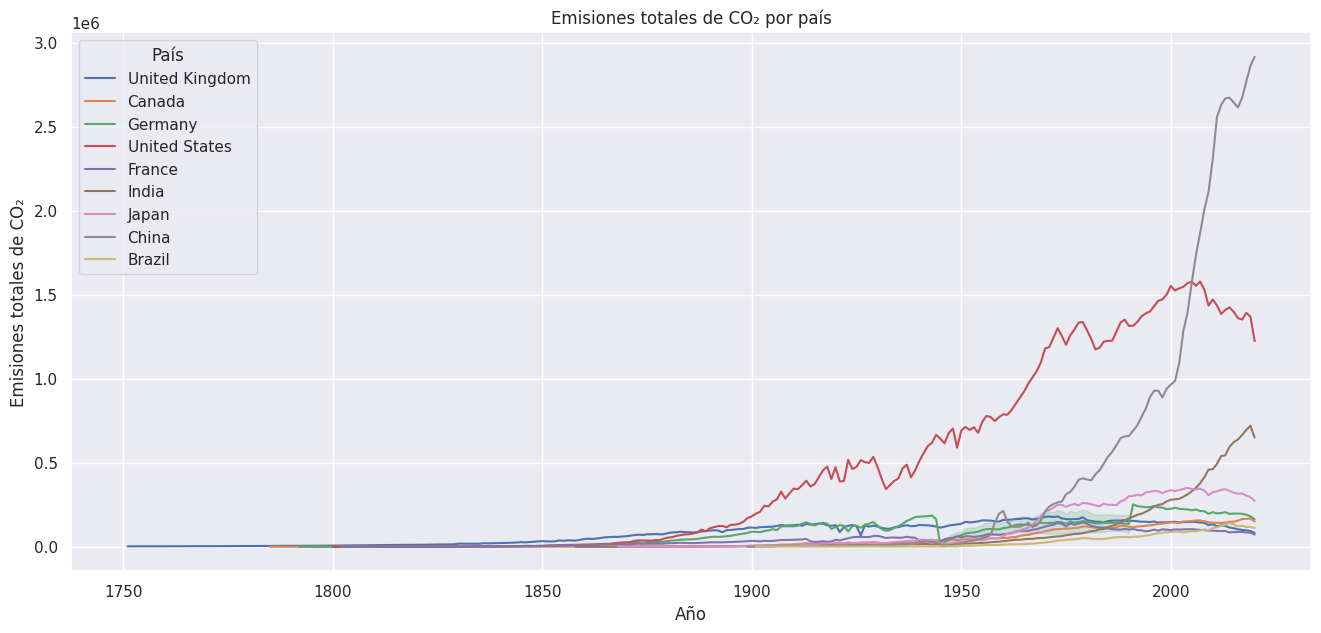

In [119]:
# Lista de países a graficar
paises = [
    'United Kingdom', 'Canada', 'Germany', 'France',
    'United States', 'Brazil', 'China', 'Japan', 'India'
]

# Filtrar el DataFrame para conservar únicamente los países de interés
df_filtrado = df_co2[df_co2['Country'].isin(paises)]

# Graficar diferenciando por país
sns.set(style="darkgrid")
fig, axes = plt.subplots(1,1, figsize=(16, 7))
sns.lineplot(data=df_filtrado, x='Year', y='Total', hue='Country')

# Ajustamos
plt.xlabel('Año')
plt.ylabel('Emisiones totales de CO₂')
plt.title('Emisiones totales de CO₂ por país')
plt.legend(title='País')
plt.show()

### Pregunta 2.4

Para el año 2007, por cada país realice un ranking de las fuentes con más emisiones de CO2 excluyendo las variables `Per Capita` y `Bunker fuels (Not in Total)`. Es decir, asigne un número de 1 a 5 a $\{$ `Solid Fuel`, `Liquid Fuel`, `Gas Fuel`, `Cement`, `Gas Flaring` $\}$, donde 1 es la mayor fuente de emisión de ese país en aquel año, y 5 indica que fue la menor; así para todos los países.

Si en 2007 no se reporta una fuente de emisión para un país, por ejemplo, si emisiones de `Gas Flaring` no se reportara, entonces asigne números de 1 a 4 a las fuentes restantes. Análogo para un menor número de datos.

Luego, por cada variable grafique un histograma de frecuencias del ranking que obtuvo la fuente emisión a lo largo de todos los países.

¿Cuál fue la fuente más contaminante en la mayoría de países en 2007?


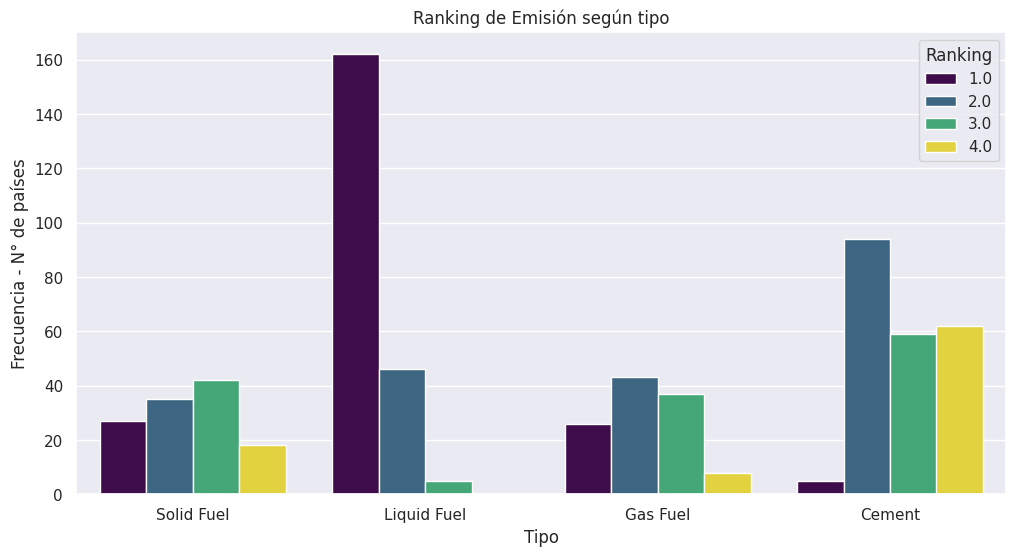

In [120]:
# Filtramos solo el año de interes
df_co2_2007 = df_co2[df_co2['Year'] == 2007]

# Excluimos las variables "Per Capita"	"Bunker fuels (Not in Total)"
df_co2_2007 = df_co2_2007.drop(columns=['Per Capita', 'Bunker fuels (Not in Total)'])

# Creamos un df temporal con solo las variables de interes para el ranking
temp= df_co2_2007.drop(columns=['Year', 'Country', 'Total'])

# Calculamos el ranking por fila (axis=1), de mayor a menor, usando el método 'min' para desempates.
# De esta forma, la fuente con mayor emisión obtiene el ranking 1.
ranks = temp.rank(method='min', axis=1, ascending=False)

# Asignamos cada ranking a una nueva columna en el DataFrame original
df_co2_2007['Solid Fuel rank']      = ranks['Solid Fuel']
df_co2_2007['Liquid Fuel rank']     = ranks['Liquid Fuel']
df_co2_2007['Gas Fuel rank']        = ranks['Gas Fuel']
df_co2_2007['Cement rank']          = ranks['Cement']

#Calculamos el ranking
data = []
for fuel in ['Solid Fuel', 'Liquid Fuel', 'Gas Fuel', 'Cement']:
    for rank in sorted(df_co2_2007[f'{fuel} rank'].unique()):
        count = len(df_co2_2007[df_co2_2007[f'{fuel} rank'] == rank])
        data.append({'Fuel': fuel, 'Rank': rank, 'Count': count})

df_plot = pd.DataFrame(data)

# Definimos las dimensiones de la figura
sns.set_theme(style="darkgrid")
plt.figure(figsize=(12, 6))

# Graficamos
sns.barplot(x='Fuel', y='Count', hue='Rank', data=df_plot, palette='viridis')

# Ajustamos
plt.xlabel('Tipo de Fuente de Emision')
plt.ylabel('Frecuencia - N° de países')
plt.title('Ranking de Emisión según tipo')
plt.ylabel('Frecuencia - N° de países')
plt.xlabel('Tipo')
plt.legend(title='Ranking')
plt.show()




---


Según el gráfico anterior, en el año 2007, los combustibles líquidos fueron la fuente de emisiones de CO₂ más contaminante y predominante en la mayoría de los países, reflejando una alta dependencia global de productos derivados del petróleo. En cambio, las emisiones asociadas a la producción de cemento y a fuentes como el gas natural o el carbón fueron menos relevantes en términos relativos (donde el cemento se encuentra como mayor contaminante en el ranking 2, 3 y 4), aunque con diferencias entre países. Esta clasificación evidencia patrones energéticos comunes a nivel global y podría orientar políticas de reducción de emisiones enfocadas en fuentes prioritarias.

---





### Pregunta 2.5

Para cada serie de total de emisiones por país, calcule el cambio porcentual a través del tiempo. Realice imputación de missings si considera necesario, justificando su imputación. Si no lo considera necesario, también justifique (se evaluará un buen criterio fundamentado).

Repita el ejercicio del gráfico de series de tiempo anterior, pero graficando los **cambios porcentuales** para años mayores o iguales a 1995. ¿Cómo interpretaría económicamente el shock sobre las emisiones de CO2 tanto en la crisis subprime como en la crisis del Covid-19?


In [121]:
# Ordenamos por "Country" y "Year"
df_co2 = df_co2.sort_values(['Country', 'Year'])

# Calculamos la variación % del Total de contaminación
df_co2['Total Growth Rate'] = df_co2.groupby('Country')['Total'].pct_change(fill_method=None)*100

# Lista de países a graficar
paises = [
    'United Kingdom', 'Canada', 'Germany', 'France',
    'United States', 'Brazil', 'China', 'Japan', 'India'
]

# Filtrar el DataFrame para conservar únicamente los países de interés
df_co2_filtrado = df_co2[df_co2['Country'].isin(paises)]

# Dado que hay valores infinitos los reemplazamos con NaN:
df_co2_filtrado.replace([np.inf, -np.inf], np.nan, inplace=True)

In [122]:
# Reporte de valores faltantes para periodos y paises seleccionados
reporte_nan = df_co2_filtrado.isna().sum().sort_values(ascending=False)

# Agregamos el porcentaje de NaNs
reporte_nan_pct = (df_co2_filtrado.isna().mean() * 100).sort_values(ascending=False)

# Crear reporte
reporte = pd.DataFrame({
    'n° faltantes': reporte_nan,
    'faltante (%)': reporte_nan_pct
})
reporte

,n° faltantes,faltante (%)
Per Capita,1164,66.061294
Gas Fuel,12,0.681044
Total Growth Rate,9,0.510783
Solid Fuel,1,0.056754
Liquid Fuel,1,0.056754
Year,0,0.000000
Country,0,0.000000
Total,0,0.000000
Cement,0,0.000000
Bunker fuels (Not in Total),0,0.000000


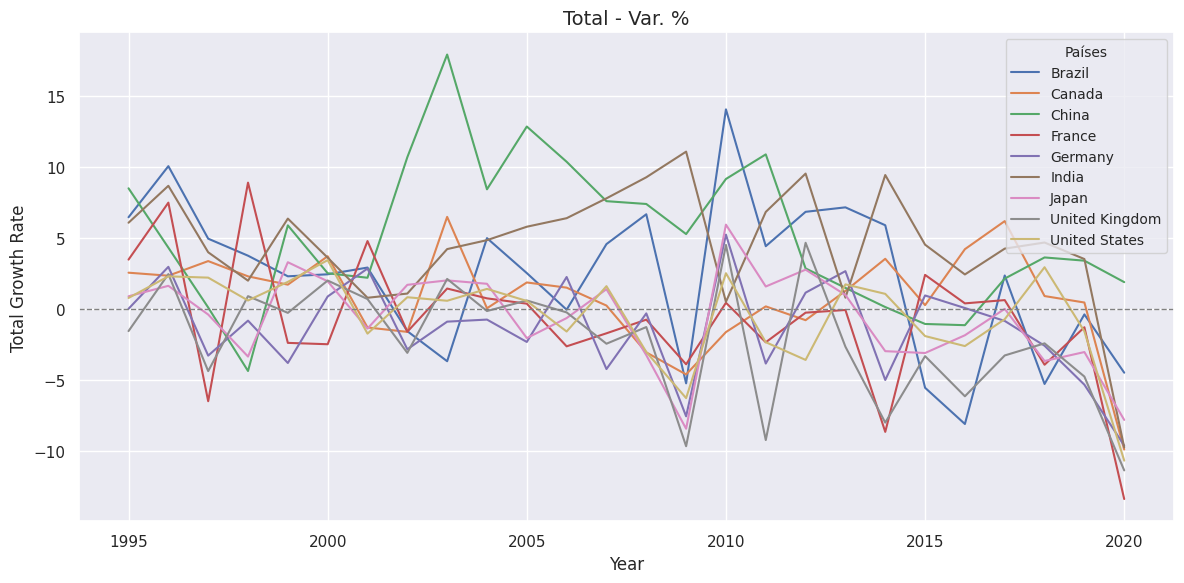

In [123]:
# Definimos las dimensiones de la figura
sns.set_theme(style="darkgrid")
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Graficamos
sns.lineplot(data=df_co2_filtrado[df_co2_filtrado['Year'] >= 1995],
             x='Year', y='Total Growth Rate', hue='Country', ax=ax)

# Ajustamos
ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.set_title('Total - Var. %', fontsize=14)
ax.legend(title='Países', fontsize=10, title_fontsize=10)
plt.tight_layout()
plt.show()


---


En el año 2009 se observa una fuerte caída en la tasa de crecimiento de emisiones de CO₂ para la mayoría de los países analizados. Esta caída es especialmente marcada en economías desarrolladas como Estados Unidos, el Reino Unido y Alemania, mientras que es más moderada en países como India y China. En el año 2020, se vuelve a registrar una caída abrupta para prácticamente todos los países de la muestra.

Estas disminuciones coinciden con las crisis económicas de esos años: la crisis subprime en 2008-2009 y la pandemia del Covid-19 en 2020. En ambos casos, la actividad económica, particularmente en sectores intensivos en emisiones como la industria y el transporte, se vio fuertemente reducida, lo que explica la contracción en las emisiones. La caída en 2020 es incluso más pronunciada, lo que podría atribuirse a las estrictas medidas de confinamiento y restricciones de movilidad impuestas a nivel global durante la pandemia.

**Importante**: La cantidad de valores NaN para los países y años seleccionados de acuerdo con el reporte son un total de nueve que representan 0.5% de total ser obervaciones, por lo que la imputación seria inncesaria dada la baja cantidad de NaN.



---





### Pregunta 2.6

Calcule el promedio a lo largo de toda la muestra ($\mathbb{E}[\cdot]$) para el cambio porcentual de cada país y genere una nueva serie con la resta entre el cambio porcentual del país $i$ en el año $t$, y el promedio del cambio porcentual del país $i$. En otras palabras, genere una serie con _**desvíos del cambio porcentual promedio**_ $\forall i,t$:

$$Nueva Serie_{i,t} = \Delta \% TotalCO2_{i,t} - \mathbb{E}[{\Delta \% TotalCO2_{i,t}}]$$

Luego, para los siguientes países:

- Reino Unido
- Canadá
- Alemania
- Francia
- Estados Unidos
- Japón
- Italia
- España


grafique en un panel _1x2_ la desviación del cambio porcentual respecto al promedio entre 2007 y 2010 en lado izquierdo, y entre 2017 y 2020 en el lado derecho (Hint: Hay comandos que facilitan esta labor. Puede intentar con `fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)`, por ejemplo).

¿Existe algún país en particular que mostró mayores desviaciones atípicas de emisión de CO2 durante el periodo de la crisis sub-prime? ¿Cómo es el comportamiento de las desviaciones atípicas de CO2 de este país durante la crisis del Covid-19?


In [124]:
# Creamos la tasa de crecimiento de contaminación total, luego calculamos el promedio por país
df_co2['Total Growth Rate']       = df_co2.groupby('Country')['Total'].pct_change(fill_method=None)*100
df_co2['Mean Total Growth Rate']  = df_co2.groupby('Country')['Total Growth Rate'].transform('mean')

# Calculamos los desvíos del cambio porcentual promedio
df_co2['Delta Growth Rate']       = df_co2['Total Growth Rate'] - df_co2['Mean Total Growth Rate']

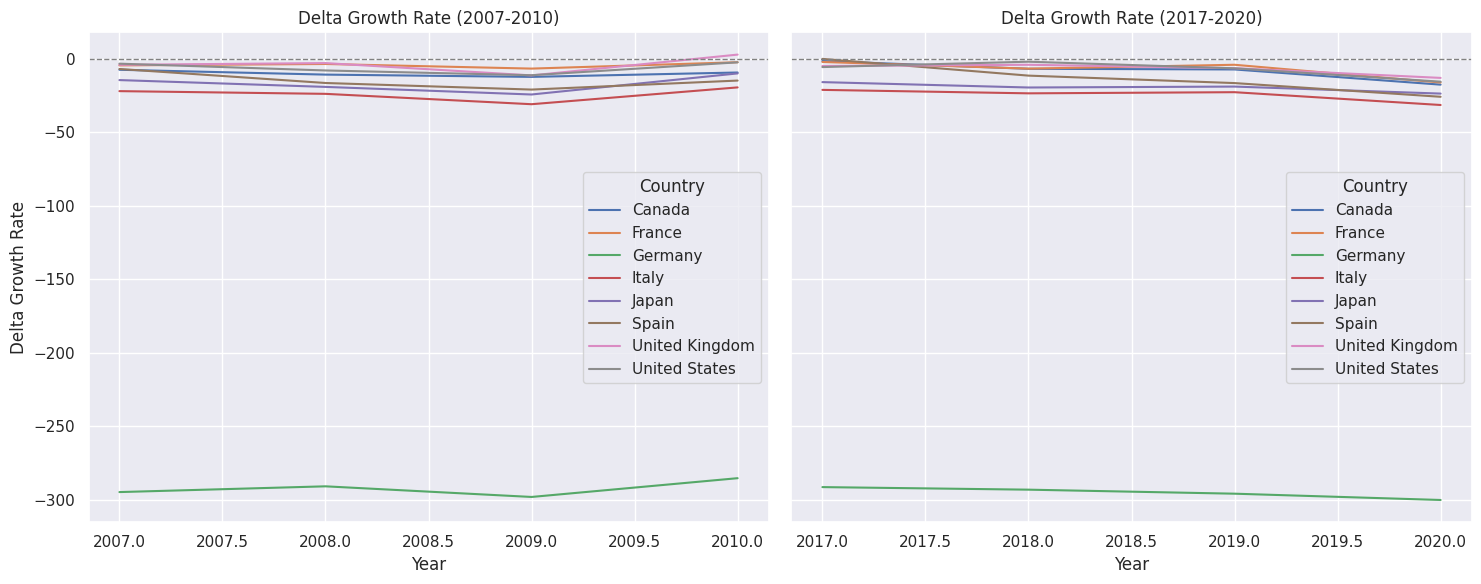

In [125]:
# Lista de países a graficar
paises = [
    'United Kingdom', 'Canada', 'Germany', 'France',
    'United States', 'Japan', 'Italy', 'Spain'
]

# Filtrar el DataFrame para conservar únicamente los países de interés
df_filtrado = df_co2[df_co2['Country'].isin(paises)]

# Definimos las dimensiones de la figura
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Graficamos por paises
sns.lineplot(data=df_filtrado[(df_filtrado['Year'] >= 2007) & (df_filtrado['Year'] <= 2010)], x='Year', y='Delta Growth Rate', hue='Country',ax=axes[0])
axes[0].set_title('Delta Growth Rate (2007-2010)')
axes[0].axhline(0, color='gray', linestyle='--', linewidth=1)

sns.lineplot(data=df_filtrado[(df_filtrado['Year'] >= 2017) & (df_filtrado['Year'] <= 2020)], x='Year', y='Delta Growth Rate', hue='Country', ax=axes[1])
axes[1].set_title('Delta Growth Rate (2017-2020)')
axes[1].axhline(0, color='gray', linestyle='--', linewidth=1)

# Ajustamos
plt.tight_layout()
plt.show()

---


Se puede observar que el país que presentó las mayores desviaciones atípicas de emisiones de CO₂ durante el período de la crisis subprime fue Alemania, mostrando niveles de desviación muy por debajo del promedio histórico y también en comparación con el resto de los países. Este mismo comportamiento se repite durante la pandemia del Covid-19, donde nuevamente Alemania se mantiene como el país con desviaciones negativas más pronunciadas, lo que sugiere una caída sostenida y poco común en sus emisiones en ambos períodos de crisis.

A pesar de estas diferencias en magnitud, la mayoría de los países tienden a seguir patrones similares de variación. Durante la crisis subprime, en el año 2009, se aprecia un quiebre claro a la baja, seguido por una leve recuperación en 2010. En contraste, durante la pandemia, aunque también se observa una caída, el quiebre es más gradual: las desviaciones comienzan a disminuir levemente desde 2019 sin mostrar una recuperación inmediata, como sí ocurrió tras la crisis de 2009. (Esto podria explicarse talves por el confinamiento, pero es una teoría).



---





### Pregunta 2.7

Genere un nuevo dataframe llamado `df_final`. Para esto, realice un INNER JOIN entre el dataframe `df_co2` y `df_merged` por "año y país" (debería terminar sólo con valores de 2007 si usted realiza un INNER JOIN).

Finalmente, grafique un mapa de calor de correlaciones (_heatmapt_) entre las variables numéricas ,excluyendo fechas.

¿Qué variables económicas, demográficas y de desarrollo humano muestran relación más importante con las emisiones de CO2? Interprete estas relaciones.


In [126]:
# Anexamos los dos dataframes indicados con inner join
df_final = pd.merge(df_co2, df_merged, left_on=['Year', 'Country'], right_on=['date', 'Country Name'], how='inner')
df_final

,Year_x,Country_x,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Per Capita,Bunker fuels (Not in Total),Total Growth Rate,...,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($),Country Name,Country Code,Year_y,Value
0,2007,Argentina,47441,999.0,21275.0,23793.0,976.0,1.195584,1245.0,-0.208246,...,16.73,7.55,0.095,0.358,0.547,4.471245e+11,Argentina,ARG,2007,46.3
1,2007,Armenia,1364,2.0,252.0,1026.0,83.0,0.452310,50.0,15.495343,...,12.07,8.23,0.239,0.343,0.418,1.041730e+10,Armenia,ARM,2007,31.2
2,2007,Austria,18779,4017.0,9741.0,4455.0,567.0,2.267470,609.0,-3.948647,...,8.74,9.76,0.018,0.304,0.678,2.457864e+11,Austria,AUT,2007,30.6
3,2007,Belarus,16504,602.0,4641.0,10819.0,442.0,1.676069,0.0,-2.631268,...,11.16,14.02,0.093,0.316,0.591,6.278737e+10,Belarus,BLR,2007,29.6
4,2007,Belgium,27780,4376.0,13234.0,9355.0,814.0,2.616368,9329.0,-3.855472,...,10.38,10.27,0.010,0.240,0.749,3.020308e+11,Belgium,BEL,2007,29.2
5,2007,Bhutan,104,22.0,61.0,NaN,21.0,0.153273,1.0,0.000000,...,33.65,12.70,0.258,0.379,0.363,2.963640e+09,Bhutan,BTN,2007,38.1
6,2007,Bolivia,3454,NaN,2084.0,1144.0,177.0,0.358797,41.0,3.382221,...,23.30,7.53,0.128,0.352,0.520,2.157371e+10,Bolivia,BOL,2007,54.5
7,2007,Brazil,96323,14071.0,65508.0,11066.0,4627.0,0.507451,4284.0,4.569338,...,16.56,6.17,0.084,0.400,0.516,1.429395e+12,Brazil,BRA,2007,54.9
8,2007,Bulgaria,14168,8292.0,3477.0,1880.0,518.0,1.829952,196.0,7.260201,...,9.65,14.27,0.093,0.304,0.603,5.612879e+10,Bulgaria,BGR,2007,36.1
9,2007,Cameroon,1567,NaN,1248.0,187.0,132.0,0.087086,97.0,51.694095,...,33.89,13.47,0.448,0.170,0.382,3.121326e+10,Cameroon,CMR,2007,42.8


In [127]:
# Eliminamos variables redudantes
corr_matrix = df_final.drop(columns=['Year_y', 'date', 'Year_x'])

# Calculamos la matriz de correlación
corr_matrix = corr_matrix.select_dtypes(include=np.number).corr()

# Variable de interés que mide el total de emisiones CO2
var_interes = 'Total'

# Reordenamos las columnas: la variable de interés  primero, luego el resto
ordered_cols = [var_interes] + [col for col in corr_matrix.columns if col != var_interes]

# Reordena tanto filas como columnas de la matriz
corr_matrix = corr_matrix.loc[ordered_cols, ordered_cols]

# Ordenamos
corr_matrix = corr_matrix.sort_values(by="Total",ascending=False).abs()
corr_matrix

,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Per Capita,Bunker fuels (Not in Total),Total Growth Rate,Mean Total Growth Rate,Delta Growth Rate,...,Arable (%),Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($),Value
Total,1.000000,0.993620,0.996528,0.992350,0.844610,0.406385,0.898290,0.061101,0.036481,0.033608,...,0.056857,0.082351,0.036786,0.111407,0.067628,0.161354,0.078798,0.215358,0.988365,0.023302
Liquid Fuel,0.996528,0.983120,1.000000,0.986677,0.855491,0.394232,0.900582,0.060327,0.044164,0.041357,...,0.029715,0.065904,0.014704,0.105823,0.087377,0.166584,0.085264,0.224747,0.990697,0.046643
Solid Fuel,0.993620,1.000000,0.983120,0.979426,0.815093,0.400779,0.878224,0.038233,0.028703,0.027429,...,0.052993,0.099809,0.028840,0.081526,0.048177,0.169453,0.114759,0.217976,0.972896,0.047871
Gas Fuel,0.992350,0.979426,0.986677,1.000000,0.839473,0.416476,0.901915,0.070837,0.058141,0.055245,...,0.025648,0.097676,0.004769,0.073400,0.085702,0.175521,0.167120,0.260771,0.983006,0.047539
GDP ($),0.988365,0.972896,0.990697,0.983006,0.874097,0.393833,0.917595,0.086413,0.036642,0.032499,...,0.062143,0.071551,0.043848,0.132681,0.080466,0.190552,0.088815,0.251418,1.000000,0.028119
Bunker fuels (Not in Total),0.898290,0.878224,0.900582,0.901915,0.783851,0.431031,1.000000,0.128058,0.047534,0.041293,...,0.093775,0.057874,0.076072,0.187230,0.082978,0.248894,0.157439,0.354305,0.917595,0.037171
Cement,0.844610,0.815093,0.855491,0.839473,1.000000,0.312939,0.783851,0.087948,0.061389,0.057345,...,0.149742,0.135783,0.166541,0.188492,0.139429,0.216270,0.107175,0.153594,0.874097,0.017290
Per Capita,0.406385,0.400779,0.394232,0.416476,0.312939,1.000000,0.431031,0.227391,0.272377,0.285497,...,0.158195,0.238176,0.100577,0.576050,0.082401,0.562957,0.041993,0.600923,0.393833,0.482082
Population,0.387217,0.343353,0.386658,0.401317,0.692984,0.064388,0.397000,0.044064,0.146185,0.145118,...,0.216432,0.072082,0.216189,0.067551,0.032569,0.063568,0.198849,0.060478,0.440936,0.042400
Area (sq. mi.),0.316031,0.305419,0.323889,0.346579,0.431584,0.034808,0.191921,0.234542,0.161088,0.173542,...,0.276438,0.228024,0.303029,0.261448,0.022759,0.165338,0.114761,0.241166,0.316236,0.219285


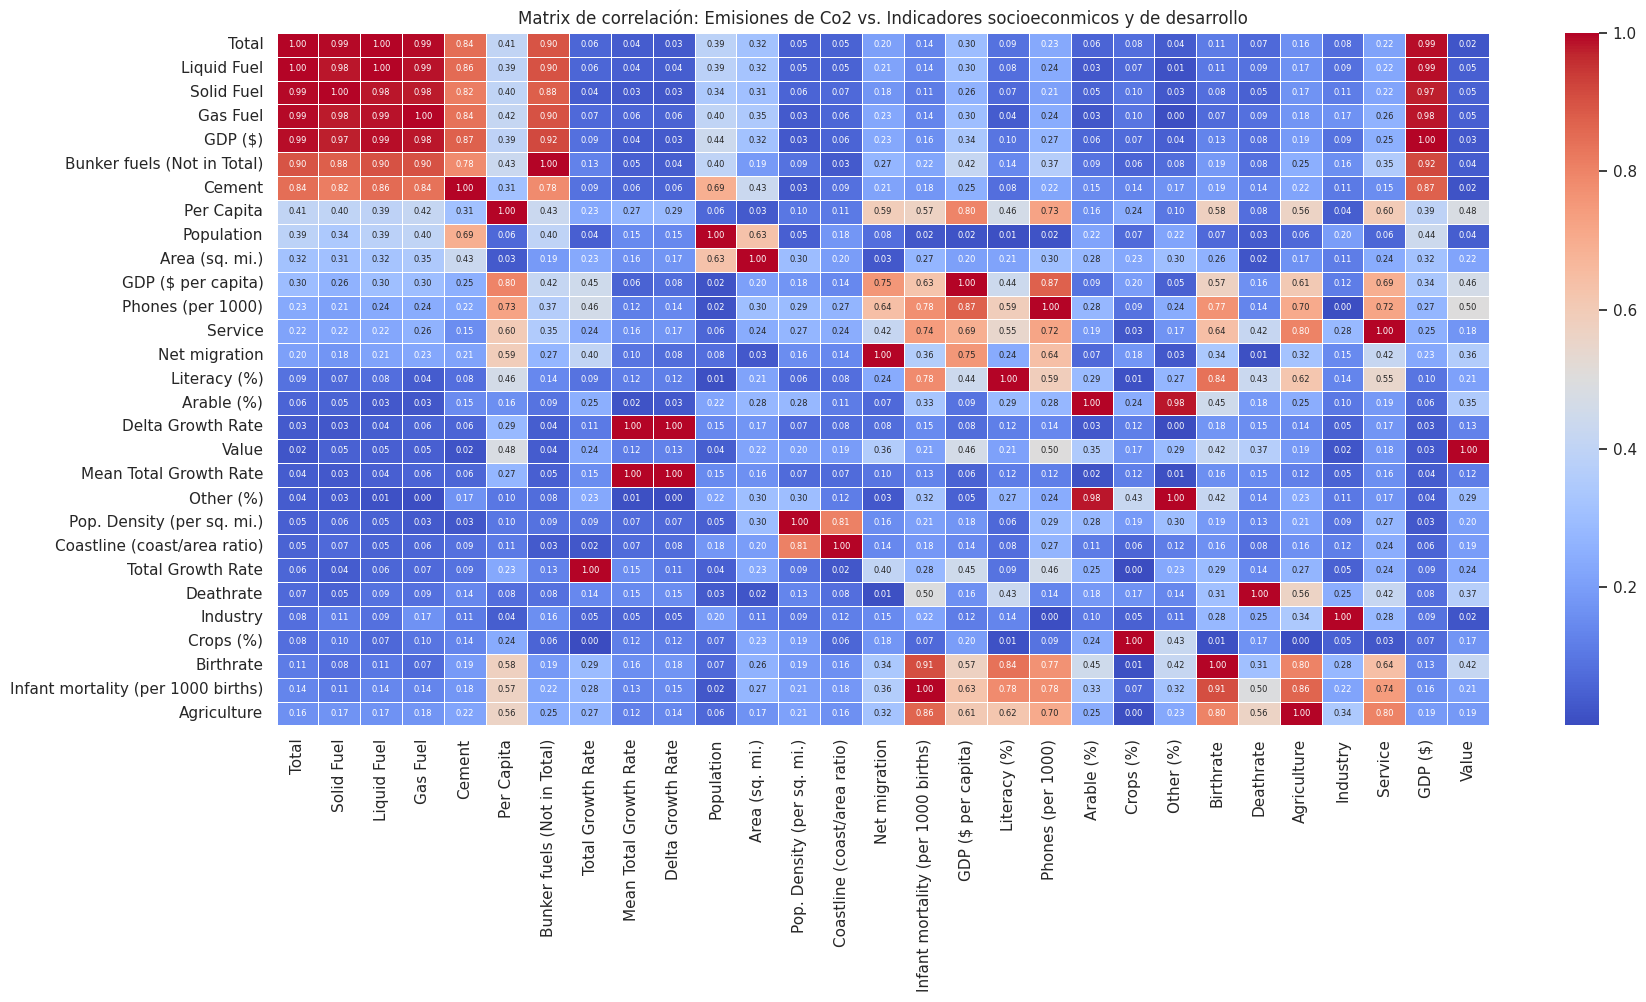

In [129]:
# Establecemos el tema y configuramos el tamaño global de la fuente
sns.set_theme()
plt.rcParams['font.size'] = 6

# Definimos la figura y el eje para el heatmap
f, ax = plt.subplots(figsize=(18, 10))

# Graficamos el heatmap
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            linewidths=.5,
            ax=ax)

# Configuramos el título en el eje y su tamaño de fuente
ax.set_title('Matrix de correlación: Emisiones de Co2 vs. Indicadores socioeconmicos y de desarrollo', fontsize=12)

# Ajustamos
plt.tight_layout()
plt.show()

---


Las emisiones de CO₂ están fuertemente correlacionadas con el PIB (GDP), la población y la estructura energética, especialmente con el uso de combustibles fósiles como el carbón, el petróleo y el gas. También se observa una correlación importante con la participación del sector industrial dentro de la economía.

En términos demográficos, los países con mayor población tienden a emitir más CO₂, ya que una mayor cantidad de personas implica un mayor uso de energía, transporte, bienes y servicios. En cuanto al PIB, las economías más grandes están claramente asociadas con mayores niveles de emisiones, debido a su mayor nivel de producción, consumo y demanda energética.

La estructura energética es otro factor central: el uso intensivo de combustibles sólidos, líquidos y gaseosos está fuertemente vinculado a niveles más altos de emisiones. De forma complementaria, una mayor participación del sector industrial en la economía también se asocia con mayores emisiones de CO₂, lo que refleja el carácter intensivo en energía de este sector.

En contraste, los países con menores niveles de desarrollo humano y alta dependencia de la agricultura muestran niveles de emisión significativamente más bajos. Esto refleja una menor industrialización y un menor consumo energético per cápita en estos países.

En síntesis, se puede concluir que el desarrollo económico conlleva mayores emisiones de CO₂ si no va acompañado de una transición energética hacia fuentes limpias y renovables. Esta observación se alinea con la advertencia planteada por Esther Duflo: los países más desarrollados son los principales responsables de la contaminación global, mientras que los países más pobres —que contribuyen muy poco al problema— serán los primeros en sufrir las consecuencias del cambio climático. Esto plantea una profunda desigualdad ambiental, y refuerza la necesidad de que los países ricos asuman una mayor responsabilidad frente a la crisis climática global.



---
